# Codebook Overview

* In the first section of the codebook we take a deep look into SVM classifier and how it works.

* In the second section we compare our SVM model to a Neural Network based model to see how performance changed.

* Lastly, we compare the 2 models and discuss why performance varied.


# Installing Dependencies

We import some of the required libaries first

In [52]:
# We install the latest scikit-learn and tensorflow versions to ensure all the modules work
# scikeras is needed for sklearn cross-validation with Keras models
!pip install --upgrade scikit-learn tensorflow==2.18.0 scikeras

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from scipy.stats import loguniform
from sklearn.dummy import DummyClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# What is SVM?

## Describing SVM Classifier

* A Support Vector Machine (SVM) classifier is a supervised machine learning algorithm that classifies data into categories by finding the best separating boundary (hyperplane) between different classes.
* SVMs define a decision boundary along a margin that separates most of the points into two classes. But it also leaves room for some misclassifcation to better cater to the all data.
* When SVM tries to find the best separating hyperplane, it only cares about the points closest to that boundary. All other points (further away) do not affect the position of the boundary.
* SVM can handle both linear and non-linear data using kernels.
* A **linear kernel** draws a straight-line (or hyperplane) decision boundary to separate the data. It works with higher dimensions as well. It does not need the kernel trick (explained in the next line), because it already works in the original feature space.
* **RBF (Radial Basis Function)** draws curved, flexible boundaries and works best with non-linear data. RBF kernel lets SVM implicitly map data into a higher-dimensional feature space to make it linearly separable This is known as the Kernel **Trick**.
* **Polynomial Kernel** lets an SVM draw curved boundaries instead of straight lines. It does this by adding power terms (like squares or cubes of the features)

More information regarding SVM
* The hyperplane maximizes the margin (distance between the boundary and support vectors) to get the best possible distinction among the classes.
* Support vectors are the data points that lie closest to the decision boundary (hyperplane) in an SVM classifier. These are the points that support or define
the position and orientation of the hyperplane. Changing the position of support vectors would alter the margin and create a new corresponding hyperplane.
* Kernels are especially helpful when mapping non-linear data where we cannot draw a straight decision boundary as kernels let SVM draw curved or flexible boundaries instead of just straight lines, by secretly mapping data into higher dimensions where that curved separation becomes a simple straight line.
* The higher dimensionality of SVM can also draw hyperplanes for 4 dimensional data or above as well.
* SVM has borth classfier and regressor algorithms.An SVM (Support Vector Machine) classifier is a tool used to sort things into different groups based on their features, like deciding if a tumor is malignant or benign in your Breast Cancer dataset. It works by drawing a line or boundary in a way that keeps the groups as far apart as possible.
* An SVM regressor is a tool that predicts continuous numbers, like guessing someone’s age or the price of a house, instead of sorting things into groups. It tries to fit a line or curve through the data points
* We are working with an SVM classifier

**For the rest, we will demonstrate how an SVM algorithm works using the breast cancer wisconsin dataset from uci**

## Visual Representation of SVM Components

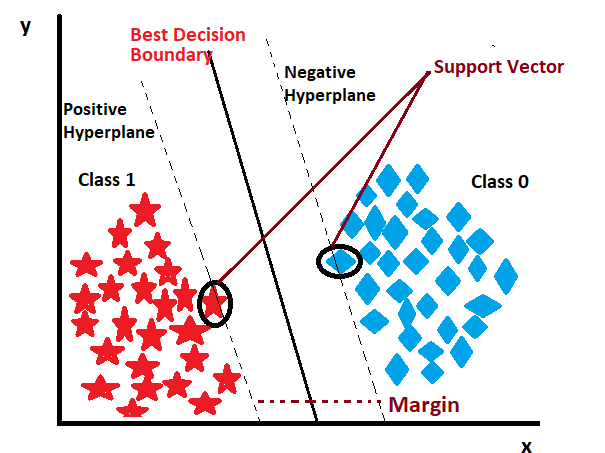

However, SVM allows misclassification as we mentioned above as real data is not so easily separable
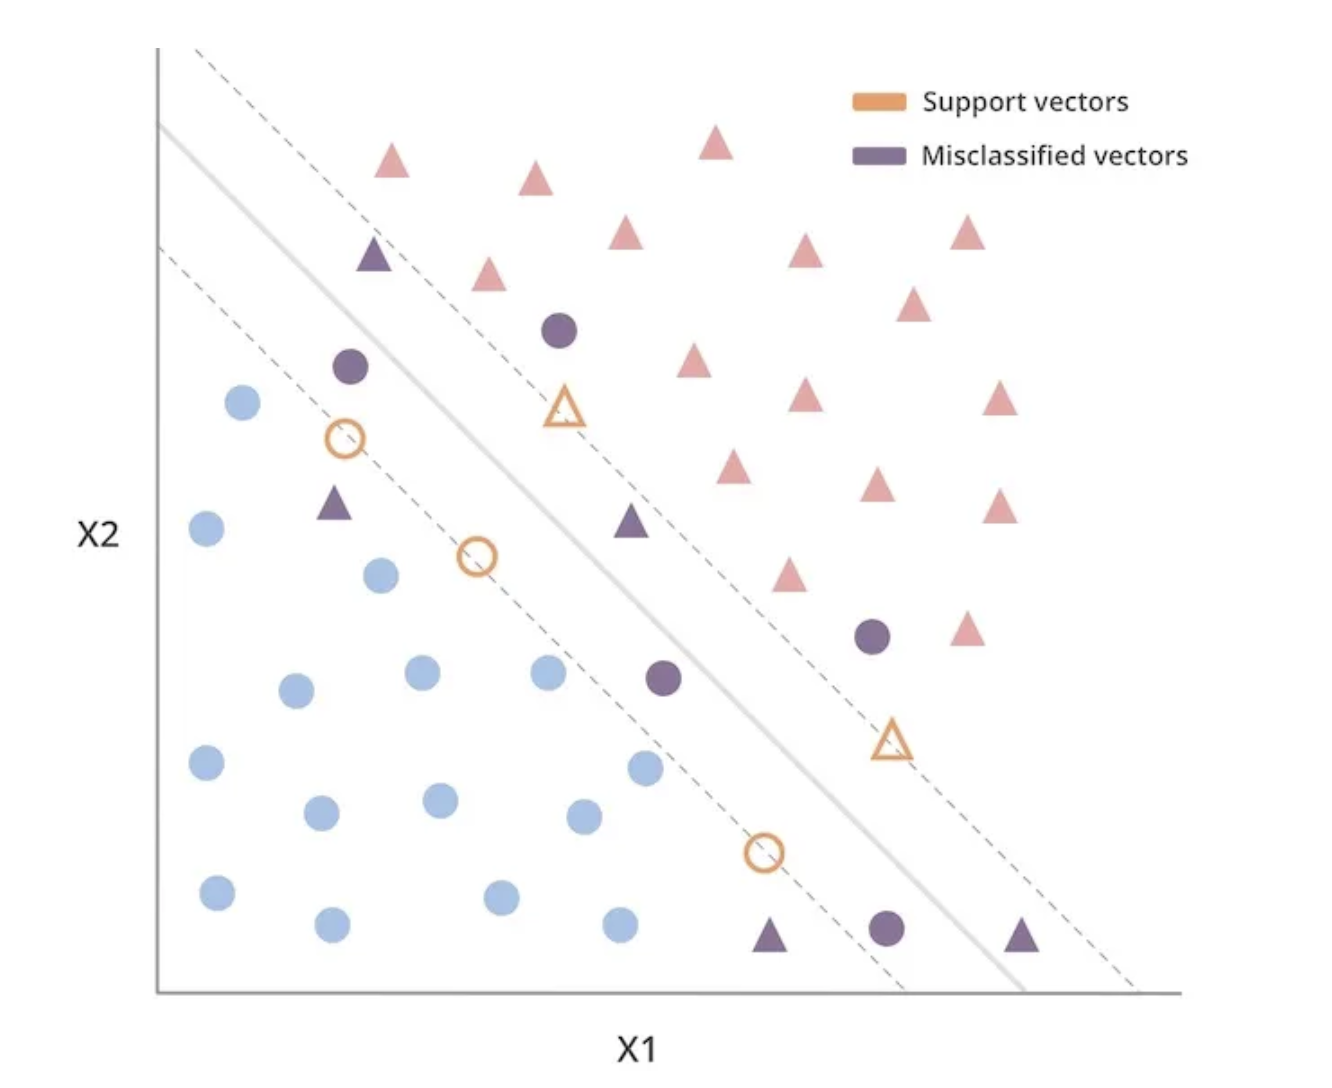

# Extraction and Loading

In [54]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [55]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Apart from the Target variable and ID, all the other features are numeric, making the features ready for the algorithm. There are also no missing values.



## Summary of the Dataset

* The dataset describes characteristics of the cell nuclei present in the image and helps us understand whether the cells are malignant or benign

[Detailed Information About the Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

**The target variable (Diagnosis) is in categorical form. We will transform it into a numeric form as SVM only deals with numeric data**

* SVM calculations require numeric data, not text or categories like “Red,” “Blue,” or “Green.” That is why we need to encode the data from text to numbers.

* SVMs find the optimal hyperplane by maximizing the margin, which is defined as the distance between data points and the hyperplane and distances requires numeric inputs.

* Furthermore, The kernel trick (e.g., RBF, polynomial) implicitly maps data into a higher-dimensional space using dot products. These operations assume vectors of numbers.

# Preprocessing
* Our preprocessing portion is relatively simple as our dataset is already cleaned. It has no missing values and the features are numeric so it is mostly ready for SVM

In [56]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


However, the target variable is catgorical and requires encoding

In [57]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [58]:
y['Diagnosis'].unique()
print(y['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64


The dataset is fairly balanced. However, the benign class accounts for a higher proportion than the malignant class.

## Encoding Target Variable
We turn the cateogrical target variables into numeric in the following step
* We use LabelEncoder as our targets don't have an inherent order

In [59]:
le = LabelEncoder()

y = y.copy()
y['target'] = le.fit_transform(y['Diagnosis'])

In [60]:
y['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

We do not require the categorical Diagnosis column from before so we drop it

In [61]:
y = y.drop('Diagnosis', axis=1)

In [62]:
print("y dtype:", y['target'].dtype)
print("y shape:", y.shape)
print("y unique:", np.unique(y['target']))

y dtype: int32
y shape: (569, 1)
y unique: [0 1]


In [63]:
# .ravel() flattens a 2-D column-vector into the 1-D array that scikit-learn classifiers require for the target
y = y.values.ravel()

# SVM Model (Without Scaling)

## Required Libraries
Libraries required for this section (Imported in the beginning)

In [64]:
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report

## Train Test Split
* We are splitting the data into w portions: Training (80%) and Testing (20%) to see how well our SVM Classifier performs

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y, random_state=42) # X contains the features and y contains our encoded targets

# Here X contains the features and y contains the encoded target
# Here the test size parameter indicates the proportion of data to be used for testing
# Stratify parameter ensures that the test dataset will have the same proportion of malignants and benings as the original data
# Stratify helps us account for the slight class imbalance

## Modeling

In [66]:
svm_model = SVC ()
svm_model.fit (X_train, y_train)

# Our model uses Radial Basis Function (RBF) kernel by default which can handle non-linear data well, which is often the case with real life data

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [67]:
y_pred_svm = svm_model.predict(X_test) # Here we let the model predict outcomes using the test dataset we made

In [68]:
conf_svm = confusion_matrix(y_test, y_pred_svm)
pd.DataFrame(conf_svm, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

# We make a confusion matrix of the actual target values and predicted target values

,Model 0,Model 1
Actual 0,72,0
Actual 1,11,31


Shows that the model accuracte identified 72 benign cases and 31 malignant cases. Howeever, 11 malignant cases were shown to be benign giving us Type II error

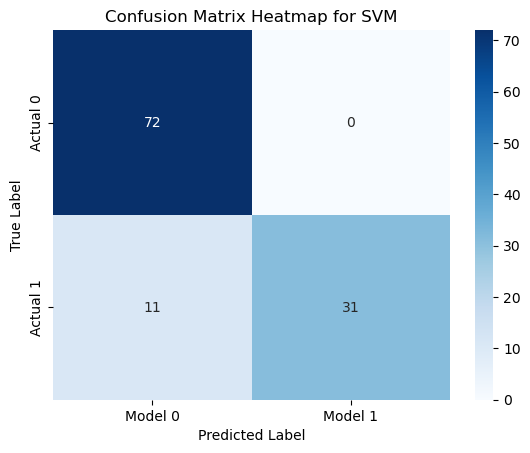

In [69]:
sns.heatmap(conf_svm, annot=True, cmap='Blues', xticklabels=['Model 0', 'Model 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Performance

In [70]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



Our model before scaling
* is 90% accurate
* This is better than our persistence model of 50% as have a better shot at identifying malignant cases than random guessing. However, health issues are sensitive and this accuracy may not be very helpful depending on our use case

In [71]:
# We also add the performance of the linear kernel before scaling
svm_model_lin_no_scale = SVC (kernel='linear')
svm_model_lin_no_scale.fit (X_train, y_train)
y_pred_svm_lin_no_scale = svm_model_lin_no_scale.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_lin_no_scale))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



We get similar results, with slightly better accuracy of 92%

# SVM Model (With Scaling)(Main Model)

## Scaling the Features

In [72]:
# We use the MinMaxScaler to bring all the features in between 0 and 1
# This is the additional code we need for scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

I tried out both StandardScaler and MinMaxScaler and found that the latter performs slightly better with our dataset. Reasons could include:

* MinMaxScaler scales data to a fixed range (default [0, 1]), preserving the shape of the distribution and for datasets without significant outliers, which seems to be the case for our dataset as we will see after visualization.

## Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,  stratify=y, random_state=42)


## Modeling (With Probabilities)

In [74]:
svm_model = SVC (probability=True, random_state=42)
# We set probability=True to find ROC curve later on
# random_state = 42 helps us be able to exactly reproduce the model
svm_model.fit (X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [75]:
y_pred_svm_scaled = svm_model.predict(X_test)

In [76]:
conf_svm_scaled = confusion_matrix(y_test, y_pred_svm_scaled)
pd.DataFrame(conf_svm_scaled, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,72,0
Actual 1,2,40


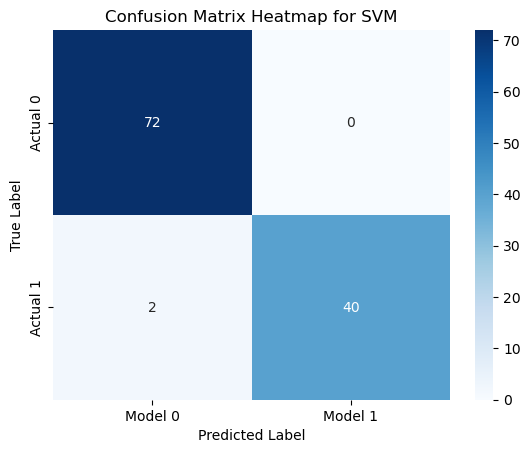

In [77]:
sns.heatmap(conf_svm_scaled, cmap='Blues',annot=True, xticklabels=['Model 0', 'Model 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Performance

In [78]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_scaled))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Our model after scaling
* Accuracy increased to 98% and we see improvements accross all metrics
* Model is better than persistence model and is now much better at detecting actual malignant cases than it was before scaling
* SVM relies on distances between points to find the best boundary. Unscaled data makes features with big numbers (like radius) overpower smaller ones (like smoothness), leading to a lopsided boundary. MinMax scaling puts everything on a level playing field (0 to 1), so the model considers all features fairly and gives us much better results

**These metrics only explain a part of how our model performs. We will next look into ROC and AUC to understand nuances of model performance**

### ROC and Adjusting Thresholds

* ROC stands for "Receiver Operating Characteristic" curve. It’s a graph that shows how well our model distinguishes between two classes (e.g., malignant vs. benign) across different decision thresholds

* The curve plots TPR vs. FPR as you vary the threshold for classifying a prediction as positive (e.g., from 0 to 1)

* A **threshold** is a cutoff value used to decide whether a prediction should be classified as the positive class (e.g., 'M' = 1) or the negative class (e.g., 'B' = 0)

* Default threshold for probability is 0.5 (positive if > 0.5, else negative)

In [79]:
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability of positive class

**AUC** stands for "Area Under the Curve" and is a single number summarizing the ROC curve. It represents the probability that the model ranks a randomly chosen positive instance higher than a randomly chosen negative instance

In [80]:
auc_score = roc_auc_score(y_test, y_pred_proba_svm)
print(f"SVM AUC Score: {auc_score:.4f}")

SVM AUC Score: 0.9964


We have an AUC of 99.64% indicating very strong performance

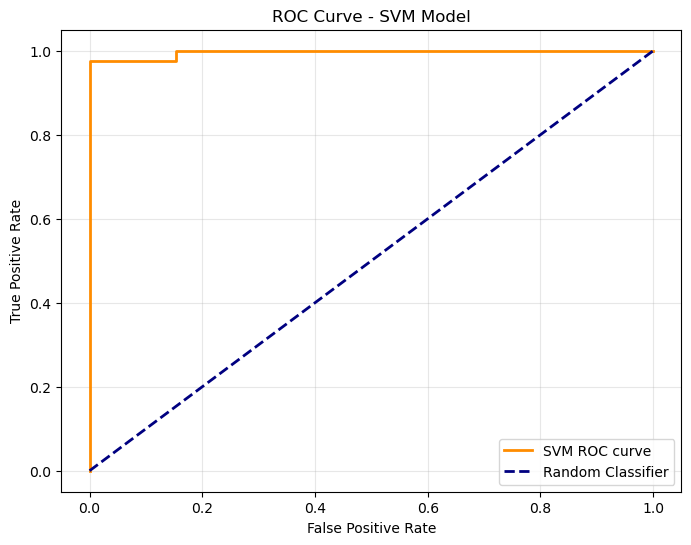

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'SVM ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#### **Adjusting Thresholds**

* Selecting a threshold depends on the context of our dataset.
* In our case of detecting malignant cells, we want to detect as many true (1) cases as possible, so we want to reduce **Type II** error (false negative) as much as we can. In a Type II error model fails to detect a true case of malignant cell
* For this we can **reduce** our threshold so that the condition for a cell to be classified as malignant becomes lower (It is classfied as malignant even with lower possibility of it being so based on the features). This may help us identify fringe cases where malignant cells act similar to benign cells
* However, the **tradeoff** is that we become more prone to **Type I** error (false positive), which is the chances of classfying benign cases as malignant increases. Now, for the medical field this is not a big issue as patients can go thorugh further inspection to check whether their case is malignant or not.
* This can be a problem is other fields such as business where **Type I** error may increase operating costs.
We will now try different thresholds and see how the model performs

In [82]:
# We start with the default 0.5 threshold for our model

custom_threshold = 0.5  # We adjust this value based on the threshold we want, in this case we put it to the default 0.5
y_pred_custom = (y_pred_proba_svm >= custom_threshold).astype(int)

conf_svm_proba = confusion_matrix(y_test, y_pred_custom)
pd.DataFrame(conf_svm_proba, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,72,0
Actual 1,2,40


The model was not able to identify 2 actual malignant cases. This might be a problem as people with malignant cells may be left untreated due to problems in the algorithm

In [83]:
# We reduce the threshold a bit to see if we can reduce Type II error

custom_threshold = 0.4  # We adjust this value based on the threshold we want, in this case we put it to the default 0.5
y_pred_custom = (y_pred_proba_svm >= custom_threshold).astype(int)

conf_svm_proba = confusion_matrix(y_test, y_pred_custom)
pd.DataFrame(conf_svm_proba, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,71,1
Actual 1,1,41


* We get 1 type II error and 1 type I error
* The accuracy of the overall model remains the same
* **However, this is better for our context as one more malignant case is properly classified.** The single false positive case is not a big issue as they will be assessed further and we will eventually figure out that they are safe

In [84]:
# We try to get rid of all Type II error

custom_threshold = 0.05  # We adjust this value based on the threshold we want, in this case we put it to the default 0.5
y_pred_custom = (y_pred_proba_svm >= custom_threshold).astype(int)

conf_svm_proba = confusion_matrix(y_test, y_pred_custom)
pd.DataFrame(conf_svm_proba, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,61,11
Actual 1,0,42


* By setting the threshold to 0.05 we are able to get classify even the most unusual malignant cases properly.
* However, type I error increases and our accuracy takes a hit as we now have 11 false positives. These false positives would increase operational costs and may strain the treatment resources of the medical facility
* **What threshold we want for our algorithm ultimately depends on what we want the alogorithm for. For a balanced approach to identifying malignant cases a threhold of 0.4 is probably the best. If the aim is to capture all malignant cases despite Type I errors, then a threshold of 0.05 may be appropiate**

So, even though we may assume we want the highest accuracy possible, that may not be the case depending on why we need the model

## Performance for Linear Kernel

In [85]:
# If we use linear kernel instead
svm_model_lin = SVC (kernel='linear')
svm_model_lin.fit (X_train, y_train)

y_pred_svm_scaled_lin = svm_model_lin.predict(X_test)

conf_svm_scaled_lin = confusion_matrix(y_test, y_pred_svm_scaled)
pd.DataFrame(conf_svm_scaled_lin, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,72,0
Actual 1,2,40


We see that the results don't change regardless of the kernel we use. Indicating that the data is fairly linear and is seprable by both types of kernels. We will later on use the make_moons dataset to show how kernel performance varies for non-linear datasets

## K-Fold Cross Validation

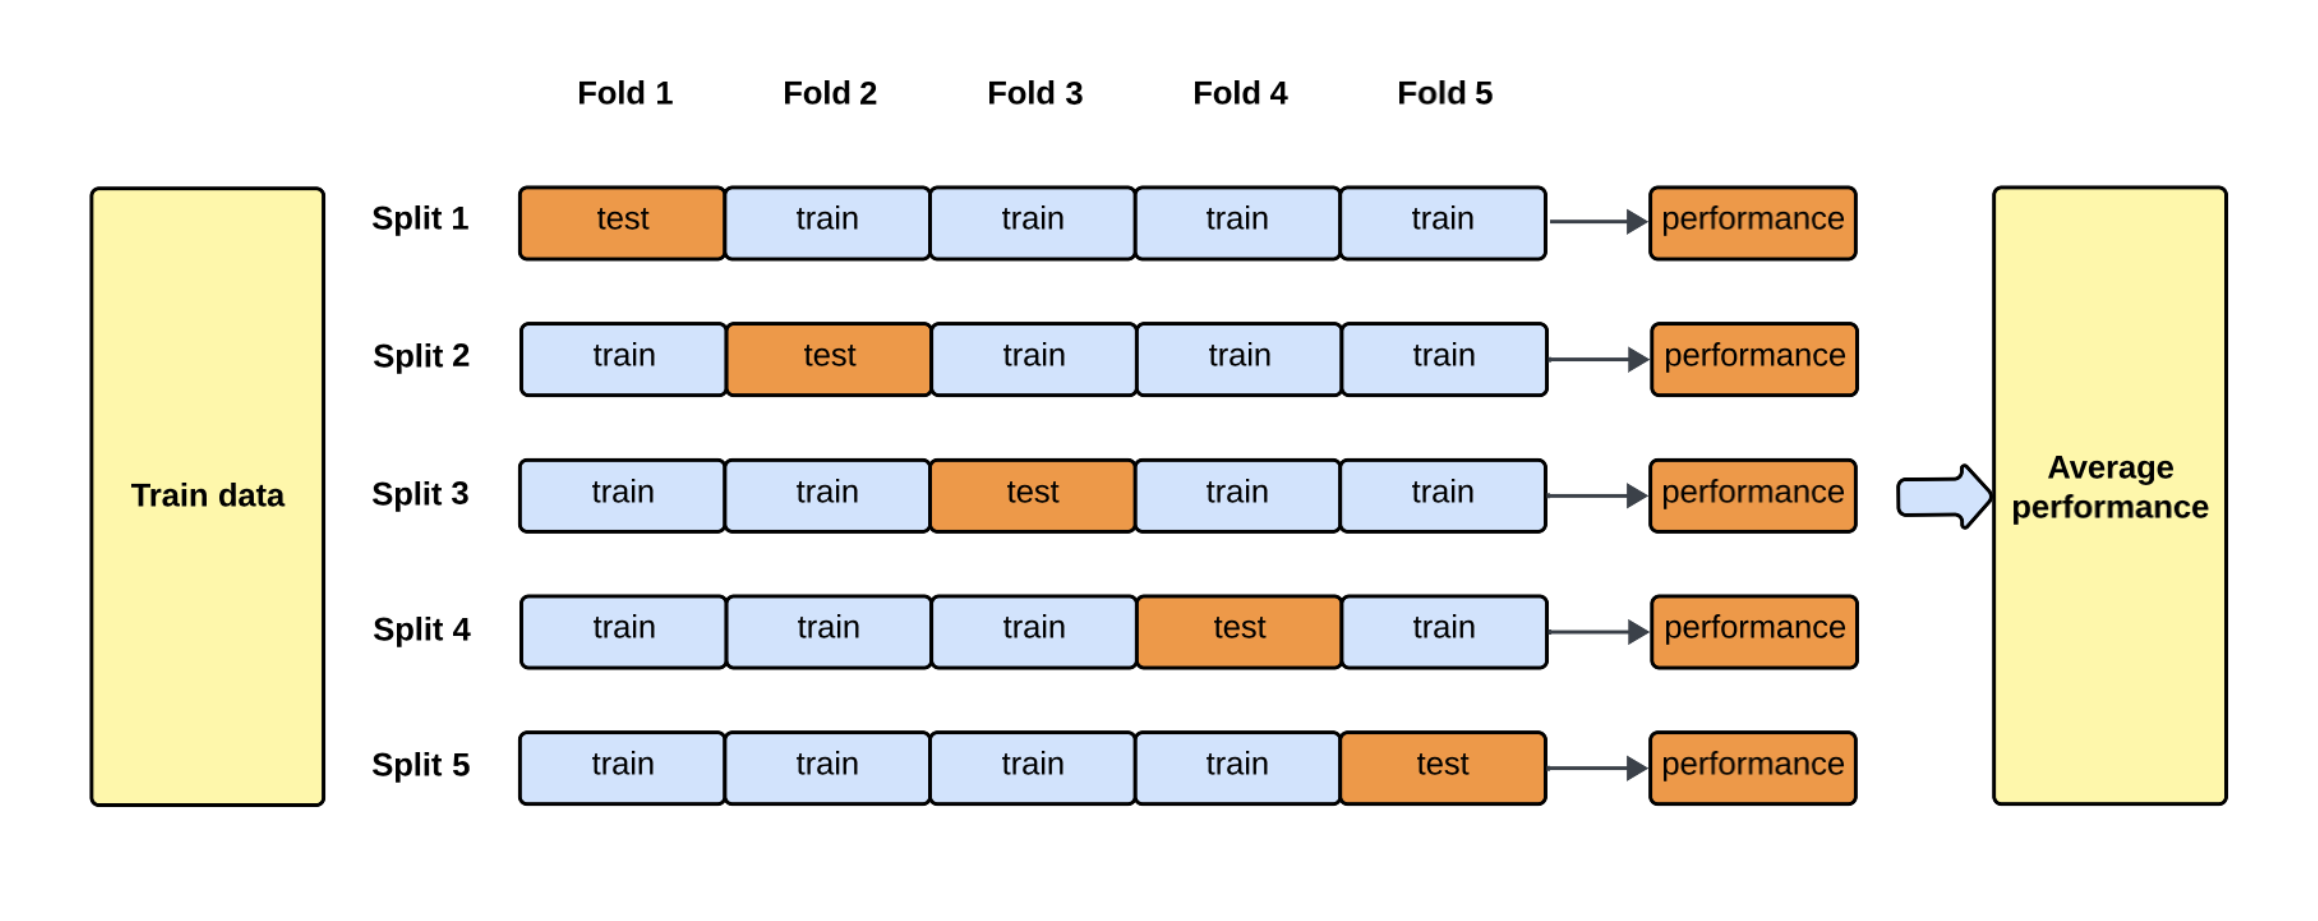

* K-fold CV divides the dataset into k folds (e.g., 5 or 10), training the model k times. For a dataset of 569 samples with 5-fold CV, it requires 5 model fits.
* A single random split can lead to variability in performance depending on how the data is partitioned. By using all data for both training and testing across k iterations, k-fold CV averages performance over multiple splits, reducing the impact of any single unlucky partition
* If the model’s performance is based on a single test set, and if the split happens to favor the training data there might be overfitting, K-Fold solves this

**So to ensure that the model performance from the previous section actual holds true regardless of the way data is partitioned, we will do K-Fold in this section and find the average accuracy**

In [86]:
y = np.ravel(y) # Turning it into a 1D array which is the expected input type for cross_val_scores

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Perform Cross Validation
scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')
# We take the SVM model we created
# We take the full dataset of features and target before the splt
# We create 5 folds to create different splits and find accuracy in each case

print(f"Accuracy for each fold: {scores}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Accuracy for each fold: [0.97368421 0.99122807 0.97368421 0.99122807 0.97345133]
Average Accuracy: 0.9807
Standard Deviation: 0.0086


* High accuracy after K-Fold indicates the model is robust and performs well regardless of the way the data is being split.
* Low standard deviation indicates that the model’s performance is consistent across folds, meaning the model is stable and less sensitive to the specific data split.

c:\Users\talha\anaconda3\Lib\site-packages\sklearn\utils\_plotting.py:440: FutureWarning: y_pred was deprecated in 1.7 and will be removed in 1.9. Please use `y_score` instead.
  warnings.warn(


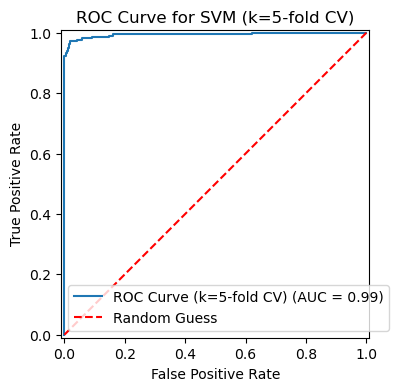

In [87]:
cv = k
y_scores = cross_val_predict(svm_model, X_scaled, y, cv=cv, method='decision_function')

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 4))
RocCurveDisplay.from_predictions(
    y_true=y,
    y_pred=y_scores,
    ax=ax,
    name=f'ROC Curve (k={k}-fold CV)'
)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for SVM (k={k}-fold CV)')
plt.legend()
plt.show()

Our ROC curve gives us further confidence that the model performs well

### Leave One Out Cross Validation (LOOCV)

* Leave-One-Out Cross-Validation (LOOCV) is a special case of k-fold cross-validation where the number of folds (k) equals the number of samples (n) in the dataset.
* Each fold consists of exactly one sample as the test set, and the remaining n-1 samples are used for training
* LOOCV uses nearly the entire dataset (n-1 samples) for training in each iteration, providing an almost unbiased estimate of the model’s generalization error. This is because the training set is as close as possible to the full dataset, reducing the risk of underrepresenting the data’s complexity.

However,
* It is mostly useful for small datasets because it is computationally heavy.
* LOOCV might end up capturing noise. Noisy data is bad for LOOCV. Noise could exaggerate errors, making LOOCV less trustworthy than k-fold CV, which handles noise better with larger test sets. K-fold cross-validation handles noise better than Leave-One-Out Cross-Validation (LOOCV) because it tests the model on multiple samples per fold rather than a single sample, diluting the impact of noisy data points.

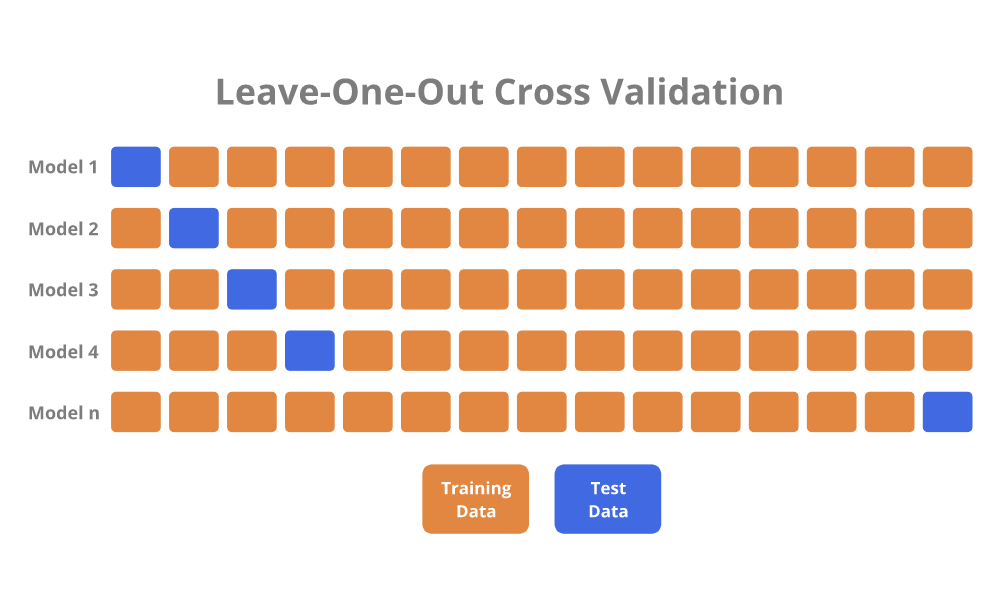

In [88]:
loo = LeaveOneOut()

# Performing Cross Validation using LOOCV
scores = cross_val_score(svm_model, X_scaled, y, cv=loo, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")
average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Accuracy for each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.

In our case, LOOCV also exhibits good accuracy, indicating that the data is not very noisy

## Hyperparameter Tuning

Now if we want to try out different combinations of hyperparameters and figure out the best possible hyperparameters for our context, we can use hyperparameter tuning methods line GridSearchCV and RandomSearchCV. We will use RandomSearchCV to do hyperparameter tuning according to our needs (We also use TunedThresholdClassifierCV to try out different probability thresholds).

**Though we are able to perform all the steps above at once using these processes, it was only made possible because we knew what hyperparameters to test. So, jumping to hyperparameter tuning without knowing what works for our model is not the best approach**.

In [89]:
# Here the svm finds best model according to our needs (Without changing threshold)
# We set all the possible combinations we believe should be tested
svm_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42, cache_size=1000), # Cache can speed up the model
    param_distributions={               # loguniform is used to test values on a logarithmic scale, optimal for SV
        'C': loguniform(1e-2, 1e2),     # Controls trade-off between margin and error
        'gamma': loguniform(1e-4, 1e0), # gamma controls RBF kernel width
        'kernel': ['rbf', 'linear'],    # We test both kernels
        'class_weight': [None, 'balanced']
    },
    n_iter=60,
    cv=5,
    scoring='recall', # We could also optimize for accuracy or other metrics
    n_jobs=-1,
    random_state=42
)
svm_search.fit(X_train, y_train)
best_svm = svm_search.best_estimator_

print("Best SVM params:", svm_search.best_params_) # This shows the best parameters for our purpose


# Now on our new svm model, set find the best threshold for our needs
# In our case we want to maximize recall to identify all cancer cases properly
tuned_clf = TunedThresholdClassifierCV(
    estimator=best_svm,
    scoring="recall",           # MAXIMIZE recall for malignant cells
    thresholds=np.arange(0.05, 0.5, 0.01),  # We want test thresholds starting from 0.05 to 0.5
    cv=5,
    random_state=42
)
tuned_clf.fit(X_train, y_train)

print(f"\nBEST THRESHOLD: {tuned_clf.best_threshold_:.4f}") # Shows us the best threshold for our purpose
print(f"CV Recall (malignant): {tuned_clf.best_score_:.4f}")

# Final predictions after tuning
y_pred = tuned_clf.predict(X_test)
y_proba = tuned_clf.predict_proba(X_test)[:, 1]

# We take look at the confusion matrix after all the tuning
cm = confusion_matrix(y_test, y_pred)

conf_df_tuning = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Model 0', 'Model 1']
)

print("\n=== CONFUSION MATRIX (0 = Benign, 1 = Malignant) ===")
display(conf_df_tuning)

Best SVM params: {'C': 1.5375920235481764, 'class_weight': 'balanced', 'gamma': 0.0001334299028518796, 'kernel': 'linear'}

BEST THRESHOLD: 0.0500
CV Recall (malignant): 0.9882

=== CONFUSION MATRIX (0 = Benign, 1 = Malignant) ===


,Model 0,Model 1
Actual 0,61,11
Actual 1,0,42


After the hyperparamter tuning we find that all the steps we have done so far can be done through hyperparameter tuning if we know how to set what we are looking for. In our case, if the goal is to identify all cases of cancer then we need to maximize recall which give us the above results. We could choose to maximize other metrics depending on our needs as well.

## Base Model

We found a lot of accuracy metrics but we need to compare them to something to figure out if they are good or bad. To understand whether we need a ML model or not in the first place we establish a baseline which will show us the performance we need to achieve to justify creating a ML model. We can take 2 approaches here.
* Compare to simple random chance
* Compare to a dummy classifier

### Random Probability Based

* The base model accuracy based on simple **random chance** for our classifier model with 2 classes is simply **50%**. This is because the chance of randomly guessing if the case is benign or malignant without any additional tools is simply 50%. It will be the same thorughout our codebook wherever we have 2 target variables
* So, a performance above 50% may justify making a ML algorithm for our context. However, we need to be careful about how much we rely on it because 60% accuracy could mean that 40% of malignant cases are going undetected
* In case of 3 target variables the persistence model would have 33.33% accuracy, this chance of randomly picking the correct outcome from 3.
* The general formula for a random chance based persistence model for classifiers is = **100/(Number of classes)**

### Using a Dummy Classifier

DummyClassifier predicts using basic strategies like always picking the most frequent class (most_frequent), random guessing proportional to class distribution (stratified), or equal-probability random guesses (uniform)

**Why do we need a dummy classifier**
* A dummy classifier shows if our SVM’s performance is better than naive guessing, proving whether it learns real patterns.
* It clarifies our performance metrics and shows us the real benefits of using a ML algorithm in our context

SVM Model Performance (Scaled):
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Dummy Classifier Performance (Stratified):
              precision    recall  f1-score   support

      Benign       0.67      0.71      0.69        72
   Malignant       0.45      0.40      0.42        42

    accuracy                           0.60       114
   macro avg       0.56      0.56      0.56       114
weighted avg       0.59      0.60      0.59       114



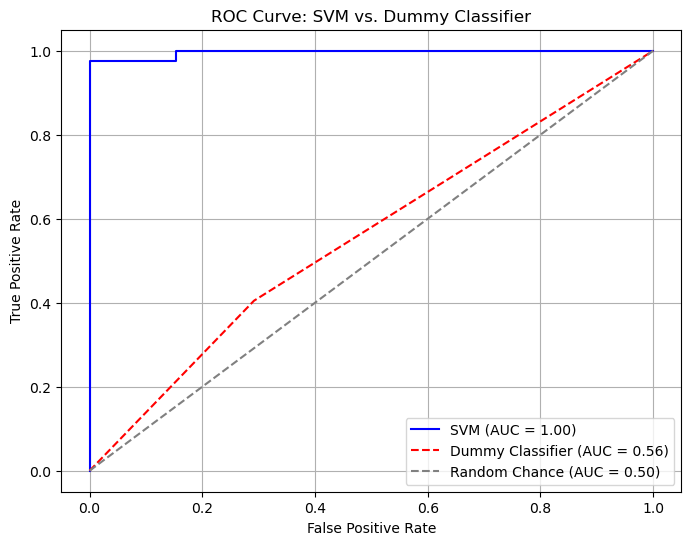

In [90]:
dummy_model = DummyClassifier(strategy='stratified', random_state=42)
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

# Evaluating SVM model performance
print("SVM Model Performance (Scaled):")
svm_report = classification_report(y_test, y_pred_svm_scaled, target_names=['Benign', 'Malignant'])
print(svm_report)

# Evaluating Dummy Classifier performance
print("\nDummy Classifier Performance (Stratified):")
dummy_report = classification_report(y_test, y_pred_dummy, target_names=['Benign', 'Malignant'])
print(dummy_report)

# ROC Curve and AUC for both models
# Getting predicted probabilities for SVM
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for positive class (Malignant)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Getting predicted probabilities for Dummy Classifier
y_prob_dummy = dummy_model.predict_proba(X_test)[:, 1]
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='blue')
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Classifier (AUC = {roc_auc_dummy:.2f})', color='red', linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM vs. Dummy Classifier')
plt.legend()
plt.grid(True)
plt.show()

Upon comparing our ML model to the dummy classifier we see:

* Model has significantly better performance metrics than random guessing or DummyClassifier. This indicates that our model picked up useful patterns and is effective in classifying our dataset

# Visualization and Dimensionality Reduction

## **The Curse of Dimensionality**

High dimensionality can lead to certain issues

* Data Sparsity: As dimensions grow (e.g., from 2D to 30D), the volume of the feature space expands exponentially, causing data points to become increasingly isolated and "spread out." This sparsity makes it hard for SVM to identify meaningful patterns or clusters between benign and malignant cases, as points appear too far apart to form dense groups.

* Distance Distortion: In high dimensions, traditional distance metrics lose their effectiveness because all points tend to appear roughly equidistant from each other.

* Overfitting Risk: High-dimensional data amplifies the chance of models like SVM memorizing noise or irrelevant variations in the training data rather than learning generalizable patterns.

However, dimensionality reduction is **should not be done before using the kernel trick** as the kernel trick maps the data into higher dimension as the dimensions we have are not enough for creating a hyperplane. Reducing dimensionality on top of that can reduce information needed to do that. The process can be useful for linear SVM however if our data has a lot of noise.

**We use dimensionality reduction on both kernels just to show the visualization even though model performance should deteriorate with kernel trick in this case.**

We will also compare performances of all the models at the end.

## Principal Component Analysis (PCA)

First method of dimensionality reduction

* Essentially a preprocessing technique to reduce columns. Here we want to turn 30 columns into 2
* It is a dimensionality reduction technique used to simplify complex, high-dimensional datasets by transforming them into a lower-dimensional space while preserving as much variance (information) as possible. It identifies the directions (principal components) in which the data varies the most, allowing us to represent the data with fewer features without losing key patterns. This enables us to visualize data with high dimensionality.
* In our case we have 30 features. Hence, to visualize our decision boundary PCA is necessary.
* As we worked with the scaled data just before this section, our PCA will be done with the scaled data
* We will also visualize our decision boundaries using both linear and rbf kernel to demonstrate how kernels affect the model.

**This is not a mandatory step to run the SVM model. We only need this if we are trying to reduce the number of features or if we need to visualize the SVM hyperplane. In general, dimensionality reduction is useful when we have to deal with highly correlated features which might create noise**

* Ideally, when using the kernel trick, we do not need dimensionality reduction. Kernels like RBF or polynomial automatically project data into a higher-dimensional space where it becomes easier to separate — so reducing dimensions beforehand actually removes useful information which may negatively affect model performance. We are doing this just for visualization.
* In linear kernels dimensionality reduction may help if there is a lot of noise in the dataset. We will later compare the performaces of different approaches to understand our dataset better.
* **So though though reducing dimensionality may help the linear kernel, we should not do so when applying kernel trick.**

In [91]:
# In this step we reduce the 30 features into 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# A key issue here is we are using PCA for dimensionality reduction before fitting it into the model
# The RBF kernel implicitly maps data into a high-dimensional space.
# Using PCA before RBF might limit this flexibility by pre-reducing dimensions, potentially discarding useful separation the kernel could use
# However, the performance was evaluated in the previous section, here we only attempt to visualize the hyperplane

# Training SVM on PCA data (for visualization)
svm_linear = SVC(kernel='linear', random_state=42) # We test both linear and rbf kernels
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42) # Gamma parameter dynamically adjusts gamma based on the dataset's variance
svm_linear.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


**Note**
* Doing PCA before using the kernel trick is not optimal. When coding please refer to the code of the previous section. Here we only attempt to visualize the hyperplane which required reducing the dimensions for the sake of 2D visualization.
* Ideally, when using the kernel trick, we do not need dimensionality reduction

### Visualization
* Here we will simply try to see how the hyperplane created by SVM looks on a 2D plane (Made possible by PCA)

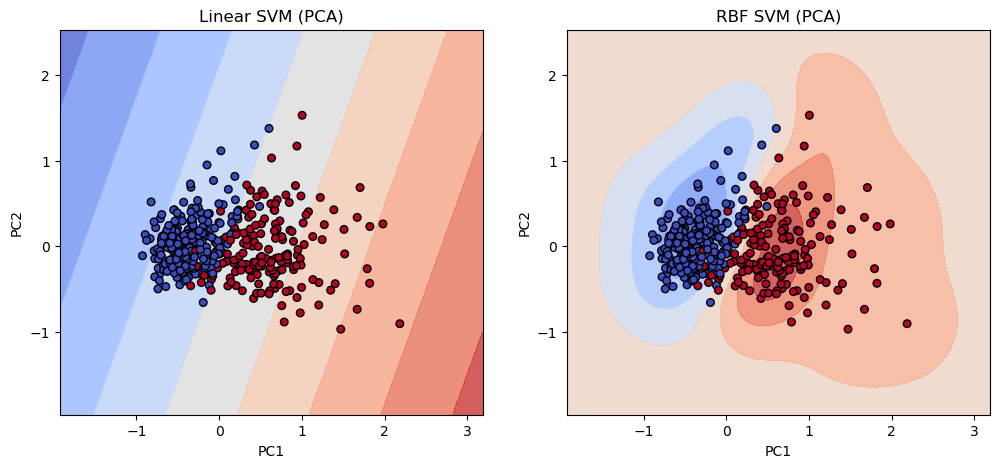

In [92]:
# We define the SVM boundary and plot it (Explanation of the code is given further down)
def plot_svm_boundary(X, y, model, title, ax):
    x_range = (X[:, 0].min() - 1, X[:, 0].max() + 1) # This line is just finding the min and max of value to put in the X_axis
    y_range = (X[:, 1].min() - 1, X[:, 1].max() + 1) # Same for y-Axis The Big X is independent values but the small x is x_axis
    xx, yy = np.meshgrid(np.linspace(*x_range, 100), np.linspace(*y_range, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Meshgrid creates all possible points between two axis ranges
    # linspace creates evenly spaced values between the min and max values we found earlier
    # The 100 parameter indicates how many points we want to create between the min and max
    # The * operator unpacks the tuple into separate arguments for linspace

    y_array = np.asarray(y) # Ensuring y is np.array for c=y as we were initially getting an error
    ax.scatter(X[:, 0], X[:, 1], c=y_array, cmap=plt.cm.coolwarm, edgecolors='k', s=30) # scatter plots the actual data points, c=y colors them based on their true class
    ax.set(title=title, xlabel=f'PC1', ylabel=f'PC2') # We set titles and labels on the axes as well


# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # We create a figure with 1 row and 2 columns of subplots
plot_svm_boundary(X_train_pca, y_train, svm_linear, 'Linear SVM (PCA)', ax1) # We plot the linear SVM on the first subplot (ax1)
plot_svm_boundary(X_train_pca, y_train, svm_rbf, 'RBF SVM (PCA)', ax2) # We plot the RBF SVM on the second subplot (ax2)
plt.show() # We show the final plot

### Explaining the Visualization Code

AI help was taken to generate the code for visualization, however I will break down each part of the code in the following:
* np.meshgrid creates a big checkerboard of imaginary points over our data and the 0.5 adds a little extra space (0.5) on each side. np.linspace makes 100 evenly spaced points between the min and max, and np.meshgrid turns these into a 100x100 grid (10,000 points total)
* Z = model.decision_function() is the model measuring how close each spot on the map is to the decision line, with positive numbers on one side and negative on the other
* Z = Z.reshape(xx.shape) puts the long list of scores back into the 100x100 grid shape, matching the map we made earlier
* ax.contourf() colors the map based on the scores
* ax.scatter() puts dots on the map where your real data points are, colored to match their group (e.g., 0=blue, 1=red in the Breast Cancer dataset)
* ax.set_title(title) puts a label at the top of the picture

For the plotting part

* fig, (ax1, ax2) = plt.subplots() Creates a figure (fig) with two subplots (ax1 and ax2) side by side
* plot_svm_boundary() draws the line that separates groups for the linear model on the left graph, using your prepared data.

This code will be used throughout the notebook for plotting svm figures

### Linear vs Non-Linear (RBF) Boundaries

* In the left hand side we can see the visualization using linear kernel which just draws a straight line as the boundary, leading to a sub-optimal hyperlane in case of non-linear data
* In the right hand side we see a curved hyperplane which captures non-linear data better
* However, the difference is not noticeable here

### Accuracy

In [93]:
# Checking accuracy for both kernels
X_test_pca = pca.fit_transform(X_test)

train_acc_linear_pca = svm_linear.score(X_train_pca, y_train)
test_acc_linear_pca = svm_linear.score(X_test_pca, y_test)

train_acc_rbf_pca = svm_rbf.score(X_train_pca, y_train)
test_acc_rbf_pca = svm_rbf.score(X_test_pca, y_test)

print("Linear SVM - Train Accuracy:", train_acc_linear_pca)
print("Linear SVM - Test Accuracy:", test_acc_linear_pca)
print("RBF SVM - Train Accuracy:", train_acc_rbf_pca)
print("RBF SVM - Test Accuracy:", test_acc_rbf_pca)

Linear SVM - Train Accuracy: 0.945054945054945
Linear SVM - Test Accuracy: 0.9736842105263158
RBF SVM - Train Accuracy: 0.9494505494505494
RBF SVM - Test Accuracy: 0.9473684210526315


Upon checking accuracy for our new PCA trained model, we see that the accuracy drops. **Since we are able to use the kernel trick, we should rely on that instead of reducing dimensions when training the model. Dimensionality reduction is mostly done for visualization needs.** Even in the case of linear Kernel the test set accuracy of the model does not improve, indicating that our features do not have a lot of noise

## AutoEncoder

**Another approach of reducing dimensionality is the use of AutoEncoder**

* They can preserve more meaningful structures and variations in the data, resulting in richer feature embeddings. Autoencoders are inherently better at capturing **non-linear data** because of their non-linear transformations, meaning they might retain more information than PCA if we are working with a non-linear dataset
* Autoencoders work well with large and high-dimensional datasets, whereas PCA becomes less effective as data complexity increases
* AutoEncoders work by compressing data into a smaller representation and then reconstructing it back to its original form.

They have two main parts:

**Encoder**: Compresses the input into a lower-dimensional latent space (reducing dimensions).

**Decoder**: Reconstructs the original data from that compressed representation.

During training, the model learns to minimize the difference between the original input and the reconstructed output

**Again, though dimensionality is reduced through AutoEncoder, the lower number of features will not necessairily give better performance as the kernel trick in SVM is able to map data in a higher dimensionality. This may be useful for visualization needs**

### Encoding, Decoding and Visualizing

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


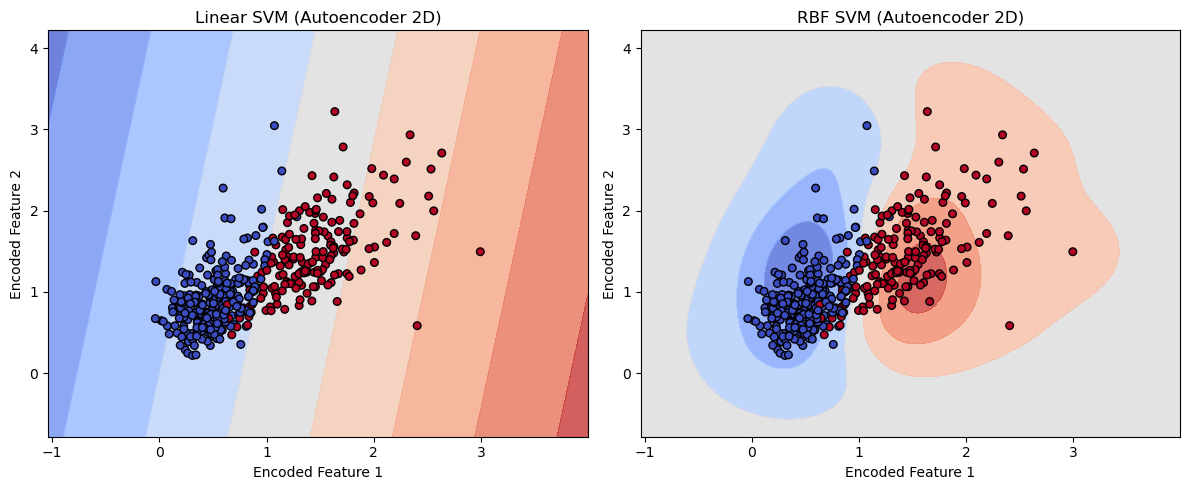

In [94]:
# Note: AI help was taken throughout this portion
# We need to make use of a new library named tensorflow

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras import regularizers


# Defining and training Autoencoder

input_dim = X_train.shape[1]
encoding_dim = 2  # Reduce to 2D for visualization

# Encoder-decoder structure
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compiling and training
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train,
                epochs=50, batch_size=32,
                shuffle=True, validation_split=0.2, verbose=0)

# Creating encoder model to extract 2D features
encoder = Model(inputs=input_layer, outputs=latent)
X_train_encoded = encoder.predict(X_train)

# Training SVMs on encoded data

svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)

svm_linear.fit(X_train_encoded, y_train)
svm_rbf.fit(X_train_encoded, y_train)


# Defining plotting function to visualize the hyperplane
def plot_svm_boundary(X, y, model, title, ax):
    x_range = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    y_range = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    xx, yy = np.meshgrid(np.linspace(*x_range, 100), np.linspace(*y_range, 100))
    y_array_2 = np.asarray(y)
    # Decision boundary
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Scatter plot of encoded data
    ax.scatter(X[:, 0], X[:, 1], c=y_array_2, cmap=plt.cm.coolwarm,
               edgecolors='k', s=30)

    ax.set(title=title, xlabel='Encoded Feature 1', ylabel='Encoded Feature 2')


# Plotting both models

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_svm_boundary(X_train_encoded, y_train, svm_linear, 'Linear SVM (Autoencoder 2D)', ax1)
plot_svm_boundary(X_train_encoded, y_train, svm_rbf, 'RBF SVM (Autoencoder 2D)', ax2)

plt.tight_layout()
plt.show()

### Accuracy

In [95]:
X_test_encoded = encoder.predict(X_test)

# Checking accuracy for both kernels
train_acc_linear = svm_linear.score(X_train_encoded, y_train)
test_acc_linear = svm_linear.score(X_test_encoded, y_test)

train_acc_rbf = svm_rbf.score(X_train_encoded, y_train)
test_acc_rbf = svm_rbf.score(X_test_encoded, y_test)

print("Linear SVM - Train Accuracy:", train_acc_linear)
print("Linear SVM - Test Accuracy:", test_acc_linear)
print("RBF SVM - Train Accuracy:", train_acc_rbf)
print("RBF SVM - Test Accuracy:", test_acc_rbf)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Linear SVM - Train Accuracy: 0.9560439560439561
Linear SVM - Test Accuracy: 0.9473684210526315
RBF SVM - Train Accuracy: 0.9582417582417583
RBF SVM - Test Accuracy: 0.9385964912280702


**The AutoEncoder method gives us around 94% accuracy for both kernels. This is less than our main model which used 30 features and also not better than our PCA model**

* This can be explained by the fact that our dataset comes with mostly linear data
* Either way as the SVM model is able to use the Kernel trick, we might not need to reduce dimensionality unless we want to visualize the hyperplane
* **However, when dealing with models where dimensionality reduction is necessary, it is important to know that AutoEncoder will perform better than PCA if the data has complex non-linear patterns**


# Comparison



In [96]:
# We make a dataframe using the accuracy results to compare the results
df_comparison = pd.DataFrame([
    ['92%', '90%'],
    ['98%', '98%'],
    ['97.30%', '94.70%'],
    ['92.10%', '93.80%']
], index=[
    'SVM (Without scaling)',
    'SVM (With scaling)',
    'SVM (PCA)',
    'SVM (AutoEncoder)'
], columns=['Linear', 'RBF'])

print(df_comparison)

                       Linear     RBF
SVM (Without scaling)     92%     90%
SVM (With scaling)        98%     98%
SVM (PCA)              97.30%  94.70%
SVM (AutoEncoder)      92.10%  93.80%


**Observations**
* The scaled SVM model without reducing dimensionality gives us the best performance. This model is also the best for adjusting thresholds and crafting the optimal model for our use case. The models tested after reducing dimensionality were mainly for visualization.
* RBF kernels of both dimensionality reduction approaches perform worse than the linear kernel as expected. We should not reduce dimensionality and try to use the kernel trick together.
* In our case, dimensionality reduction does not help the linear kernel either. This indicates that our data does not have a lot of noise and the curse of dimensionality does not affect our model.

# How Kernels Affect SVM (Using make_moons)

* Here we will further demonstrate how SVM works using the make_moons dataset from sklearn. This dataset is inherent more non-linear and will help us look at how kernels affect the model.

* We do so becasuse after our previous visualization after PCA we get fairly linear datapoints

In [97]:
from sklearn.datasets import make_moons

In [98]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)  # Without noise we would get 2 perfect crescent moons unlike real life data.
# The noise parameter spreads the datapoints making it more realistic

# Split into train/test sets so that we can compare model performance afterwards
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We train linear and RBF SVM
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf', gamma='scale')

""" Gamma='scale' lets scikit-learn automatically automatically adjusts how
sensitive the SVM is based on how spread out your data.
'scale' is the default input but we can manually change it if we want"""

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


We visualize the SVM boundary on make moons dataset to show how rbf kernel can better demarcate non-linear data

## Visualizing How Both Kernels Classified Train and Test Data
* We visualize SVM hyperplanes again using more non linear data to better demonstrate the power of kernels
* We further split the points based on training and testing data to visualize how well our model captured the test dataset
* PCA is not needed here for visualization as the model has only 2 features

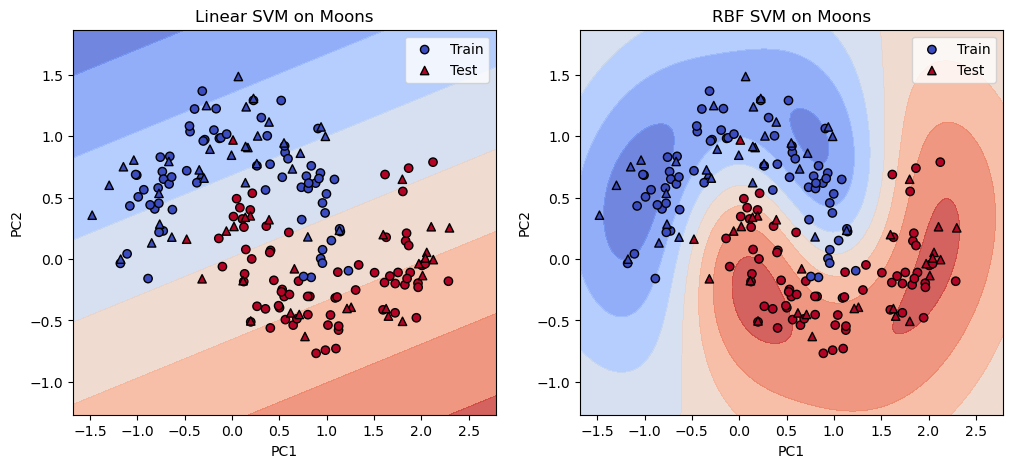

In [99]:
def plot_svm_boundary(X_train, y_train, X_test, y_test, model, title, ax):
    # Create a grid that covers the whole data space
    xx, yy = np.meshgrid(
        np.linspace(X_train[:, 0].min()-0.5, X_train[:, 0].max()+0.5, 200),
        np.linspace(X_train[:, 1].min()-0.5, X_train[:, 1].max()+0.5, 200)
    )

    # Getting model predictions for each point in the grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot training and test points differently
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm,
               edgecolors='k', marker='o', label='Train') # The label parameter separates the training and testing icons
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm,
               edgecolors='k', marker='^', label='Test')

    ax.set(title=title, xlabel=f'PC1', ylabel=f'PC2')
    ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_svm_boundary(X_train, y_train, X_test, y_test, svm_linear, 'Linear SVM on Moons', ax1)
plot_svm_boundary(X_train, y_train, X_test, y_test, svm_rbf, 'RBF SVM on Moons', ax2)

plt.show()

From the figures it is evident that the rbf kernel is much better at identifying different classes due to the non-linear nature of the data

## Linear vs RBF Performance

In [100]:
# Predict on test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate on unseen data
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with linear kernel: {accuracy_linear:.2f}")
print(f"Accuracy with rbf kernel: {accuracy_rbf:.2f}")

Accuracy with linear kernel: 0.83
Accuracy with rbf kernel: 0.97


The linear kernel kernel gives 83% accuracy while the non-linear kernel can achieve 97% accuracy, demonstrating the strength of rbf kernel when we have to deal with non-linear data.

# SVM with 3 Target Variables (Using Iris)

Here we aim to demonstrate that SVM works with more than 3 target variables as well

In [101]:
from sklearn.datasets import load_iris

In [102]:
# We load iris as a dataframe to take a look at it
df = sns.load_dataset('iris')

In [103]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


It has 4 features and a Target
* So this will require PCA/Auto-encoding for visualization. We do PCA in this case as the dataset has simple patterns

**Note: PCA before modeling won't give the best model performance for kernels during kernel trick due to loss of information. But we are doing so to mainly visualize how the hyperplane looks like for 3 target variables. If our primary goal was to improve model accuracy we would take a different approach**

In [104]:
# The Iris dataset already comes with features and target separated so we load it into X and y again to make our modeling process easier
iris = load_iris()
X = iris.data
y = iris.target  # 0: Setosa, 1: Versicolor, 2: Virginica
feature_names = iris.feature_names
target_names = iris.target_names

In [105]:
# Splitting and scaling with MinMax
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train SVM with linear and RBF kernels
svm_linear = SVC(kernel='linear', decision_function_shape='ovr')
svm_rbf = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovr')
svm_linear.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)

""" The decision_function_shape parameter in an SVM (Support Vector Machine) is like a rule that tells
the model how to handle more than two groups when deciding which group a flower belongs to,
like in your Iris dataset with Setosa, Versicolor, and Virginica. Since SVM is designed to
work with just two groups at a time, this setting helps it figure out what to do with three groups """

' The decision_function_shape parameter in an SVM (Support Vector Machine) is like a rule that tells\nthe model how to handle more than two groups when deciding which group a flower belongs to,\nlike in your Iris dataset with Setosa, Versicolor, and Virginica. Since SVM is designed to\nwork with just two groups at a time, this setting helps it figure out what to do with three groups '

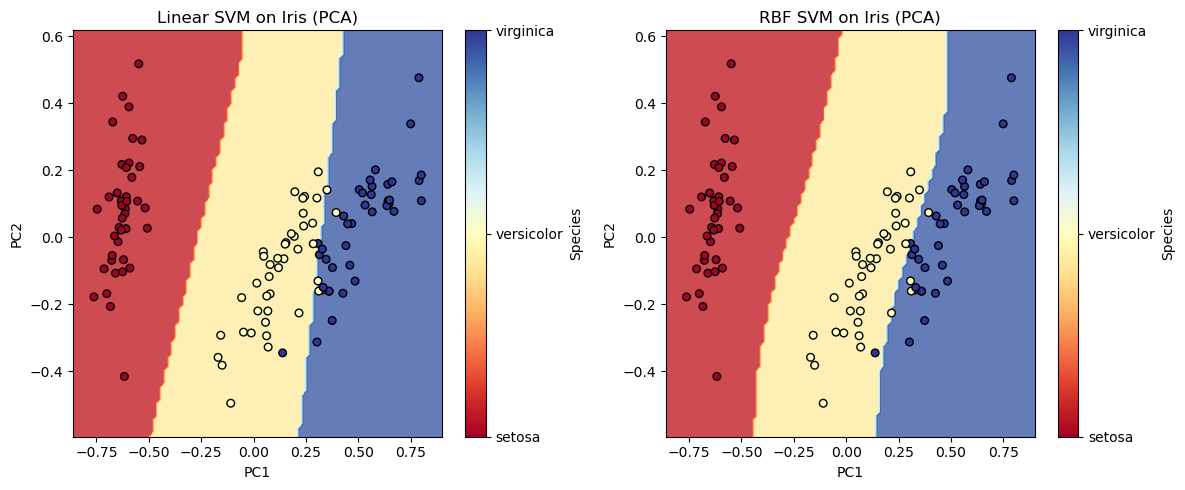

In [106]:
# Plotting function (multi-class)(We explain the relevant code for the multiclass visualization as well)
# Plotting function (multi-class)
def plot_svm_boundary(X, y, model, title, ax):
    x_range = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1) # This line is just finding the min and max of value to put in the X_axis
    y_range = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1) # Same for y-Axis The Big X is independent values but the small x is x_axis
    xx, yy = np.meshgrid(np.linspace(*x_range, 100), np.linspace(*y_range, 100))
    # Meshgrid creates all possible points between two axis ranges
    # linspace creates evenly spaced values between the min and max values we found earlier
    # The 100 parameter indicates how many points we want to create between the min and max
    # The * operator unpacks the tuple into separate arguments for linspace
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # ravel flattens the array and c_ combines the two arrays column-wise
    Z = np.argmax(Z, axis=1).reshape(xx.shape) # argmax finds the index of the highest value along axis 1 (rows) which corresponds to the predicted class
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8) # contourf draws filled contours, cmap sets the color scheme and alpha sets the transparency
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=30) # scatter plots the actual data points, c=y colors them based on their true class
    ax.set(title=title, xlabel=f'PC1', ylabel=f'PC2') # We can set titles and labels on the axes as well
    plt.colorbar(scatter, ax=ax, label='Species', ticks=[0, 1, 2], # Adding a color bar to indicate species
                 format=plt.FixedFormatter(target_names)) # FixedFormatter allows us to set custom labels for the ticks

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # We create a figure with 1 row and 2 columns of subplots
plot_svm_boundary(X_train_pca, y_train, svm_linear, 'Linear SVM on Iris (PCA)', ax1) # We plot the linear SVM on the first subplot (ax1)
plot_svm_boundary(X_train_pca, y_train, svm_rbf, 'RBF SVM on Iris (PCA)', ax2) # We plot the RBF SVM on the second subplot (ax2)
plt.tight_layout() # This adjusts the spacing between subplots to prevent overlap
plt.show() # We show the final plot

**We can see that SVM doesn't only work for 2 target variables, but it also works with multiple like 3 in the the iris dataset**

## Base Model (3 Target Categories)

In [107]:
# Model performance (Just to compare with a different persistence model)
X_test_pca = pca.transform(X_test_scaled)

y_pred_linear = svm_linear.predict(X_test_pca)
y_pred_rbf = svm_rbf.predict(X_test_pca)

# Calculate and print accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")

Linear SVM Accuracy: 1.00
RBF SVM Accuracy: 0.97


**This section was made only to demonstrate how our baseline performance changes depending on the number of target variables we have**

* The model shows perfect accuracy with the linear kernel. It also shows high accuracy with rbf kernel (But lower than linear, as expected) despite PCA not being the optimal approach for it (Done to compare visualization). This could be because the 3 classes already had very distinct features, making classification easy.

* **Now we contrast it against the random probability based model for 3 target variables.** In the case of 3 target variables the accuracy of a basic random chance based persistence model will be 33.33%. So the model may be useful if it can detect cases with an accuracy over 33.33%, like in our case.

* We can also use DummyClassifier for the same purpose

# **Neural Network**

In the previous phase of this analysis, I modeled the Breast Cancer Wisconsin (Diagnostic) dataset using a Support Vector Machine (SVM). The SVM proved effective by identifying an optimal hyperplane to separate malignant and benign cases, maximizing the geometric margin between the classes.

In this phase, I will develop a Neural Network (Multi-Layer Perceptron) to determine if a deep learning approach can outperform the classical SVM baseline. The goal is to investigate whether the hierarchical feature learning of a Neural Network offers a tangible advantage over the kernel-based mapping of the SVM for this specific tabular dataset.



## Theoretical Framework: SVM vs. Neural Network

While both models are supervised classification algorithms, they approach the decision boundary problem differently:

A. The Support Vector Machine
* Core Mechanism: The SVM solves a convex optimization problem to find the "widest street" (maximum margin) between classes.

* Key Characteristic: It relies on Support Vectors, the specific data points closest to the boundary, to define the model.

* Limitation: It is essentially a geometric approach. While the RBF kernel allows it to handle non-linearity, it does not "learn" new features; it projects existing features into higher dimensions.

B. The Neural Network
* Core Mechanism: I will implement a Feedforward Neural Network (Multi-Layer Perceptron). Unlike the SVM, which relies on a fixed kernel, the Neural Network learns its own internal representation of the data.

* Key Characteristic: Through Backpropagation, the network adjusts weights across multiple hidden layers. This allows it to model highly complex, non-linear relationships by creating hierarchical combinations of the original 30 features.

* The Trade-off: Neural Networks are "universal function approximators," meaning they can theoretically learn any pattern. However, they are prone to overfitting on small datasets (like this one with only 569 samples) and lack the guarantee of finding a global minimum that SVMs possess.

## Milti-Layer Perceptron (MLP)

For our Breast Cancer dataset, we choose a Multi-Layer Perceptron (MLP) because the data is tabular (structured). There are other models like CNNs and RNNs but they are built for other tasks like image prcessing and so on.

We will take a brief look at how MLP works before implementing the model.

1. **The Architecture**

* Input Layer: Receives the raw signal vector (your 30 breast cancer features). No computation happens here; it just passes the numbers through.

* Hidden Layers: The computational core. Each neuron in these layers connects to every neuron in the previous layer (fully connected). This is where feature extraction happens.

* Output Layer: Produces the final prediction. For your case (binary classification), this is a single neuron outputting a probability score between 0 and 1


2. **The Computation** (Per Neuron) Inside every single neuron in the hidden layers, a two-step mathematical operation occurs:

* Weighted Sum: The neuron multiplies each input  by a specific weight —which represents the importance of that feature—and adds a bias.

$$z = \sum (x_i \cdot w_i) + b$$

* **Activation Function:** The result is passed through a non-linear function, typically ReLU (Rectified Linear Unit). This is crucial because it allows the network to learn complex, non-linear boundaries (curves) rather than just straight lines.

3. **The Learning (Backpropagation)** The "intelligence" of the MLP comes from training:

* Forward Pass: Data flows through the network to generate a prediction.

* Loss Calculation: The model calculates the difference between its prediction and the actual label (e.g., using Binary Cross-Entropy).

* Backpropagation: The model sends this error signal backwards through the network. It uses an optimizer (like Adam) to slightly adjust the weights and biases in a direction that reduces the error

**For our Dataset**

In the context of the Breast Cancer Wisconsin dataset, the MLP operates by transforming the 30 raw clinical measurements into a probability of cancer. The process begins at the input layer, which receives the 30 standardized features for a patient (e.g., radius_mean, texture_mean, concavity). As these values pass into the hidden layers, the network learns to identify complex combinations; for instance, a specific neuron might learn to activate strongly only when it sees both "high perimeter" and "high fractal dimension," effectively creating a new, abstract feature that represents "large and jagged." These signals are processed through ReLU activation functions, which allow the model to draw a curved, non-linear boundary to separate complex edge cases. Finally, the output neuron aggregates these patterns and applies a Sigmoid function to squash the result into a single value between 0 and 1—representing the probability that the specific tumor is Malignant.

**Keras/TensorFlow over scikit-learn for MLP**

We chose Keras/TensorFlow over scikit-learn's MLPClassifier for our MLP implementation primarily because of its superior flexibility in hyperparameter tuning and training visibility. Keras Tuner allows us to dynamically search over architectural choices like the number of hidden layers (1 to 3) and neurons per layer, whereas sklearn requires predefined fixed tuples for hidden_layer_sizes. Additionally, Keras provides detailed training history including loss, accuracy, and validation metrics per epoch, enabling us to plot learning curves and detect overfitting—sklearn only offers a basic loss_curve_. For our medical diagnosis task where recall is critical, Keras allows us to track custom metrics like Recall during training, and its powerful callbacks (EarlyStopping, ModelCheckpoint) give us fine-grained control over the training process. While sklearn's MLPClassifier is simpler and integrates well with sklearn pipelines, Keras is the industry standard for deep learning and better suited for projects requiring careful hyperparameter optimization and performance monitoring like ours.

## Installing Dependencies

In [141]:
# his library automates the process of testing different combinations (neurons, learning rates, dropout) so we don't have to change numbers manually 50 times.
!pip install keras-tuner

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler

In [143]:
# Set all random seeds for reproducibility
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# For additional determinism (may slow down training slightly)
import os
os.environ['PYTHONHASHSEED'] = '42'
tf.config.experimental.enable_op_determinism()

### Data Preparation

In [144]:
# We load the dataset again for the NN model

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

#### Encoding the Target Variable

Like in the SVM model, we encode the target variable in 0 and 1

In [145]:
le = LabelEncoder()

y = y.copy()
y['target'] = le.fit_transform(y['Diagnosis'])

y['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [146]:
# We drop the older text column
y = y.drop('Diagnosis', axis=1)

print("y dtype:", y['target'].dtype)
print("y shape:", y.shape)
print("y unique:", np.unique(y['target']))

y dtype: int32
y shape: (569, 1)
y unique: [0 1]


In [147]:
# .ravel() flattens a 2-D column-vector into the 1-D array that scikit-learn classifiers require for the target
y = y.values.ravel()

## Train-Test Split and Scaling

In [148]:
# 1. Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize Scaler
scaler = StandardScaler()

# 3. Fit ONLY on Training Data
# The scaler learns the mean/std of the TRAINING set only.
X_train_scaled = scaler.fit_transform(X_train)

# 4. Transform Test Data
# We use the mean/std from the training set to scale the test set.
# DO NOT call .fit() here. Only .transform().
X_test_scaled = scaler.transform(X_test)

MinMax scaling worked better for our SVM model, likely due to the geometric approach of the model. But here, standard scaling is the better approach.

* With MinMaxScaler: If you have one massive tumor, MinMaxScaler sets that to 1.0. It then squashes all normal tumors into a tiny range (e.g., 0.01 to 0.05). The neural network struggles to see the difference between "small" and "medium" tumors because they are squashed so close together. It also requires numbers to be positive if our range is 0 to 1.

* With StandardScaler: The outlier stays far away (e.g., +5.0), but the normal tumors are spread out comfortably around 0. The network can clearly distinguish between them.

Neural Networks learn faster when inputs are centered around zero (e.g., -1 to 1).

**Why we did scaling after the split**

To prevent data leakage, feature scaling was performed after the train-test split. The scaler was fit exclusively on the training set to ensure the test set represents truly unseen data

## Building the MLP Model

Now we build our Multi-Layer Perceptron (MLP) neural network. We'll use Keras Tuner to automatically find the best hyperparameters.

**Why MLP for this task?**
- MLPs are well-suited for tabular data like our breast cancer dataset
- They can learn complex non-linear relationships between features
- With proper tuning, they can achieve high accuracy for binary classification tasks

In [149]:
# Define a function that builds our model with tunable hyperparameters
# Keras Tuner will call this function many times with different hyperparameter values

def build_model(hp):
    """
    Build an MLP model with hyperparameters that Keras Tuner will optimize.
    
    hp: HyperParameters object that defines the search space
    """
    model = keras.Sequential()
    
    # Input layer - 30 features from our dataset
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Tunable number of hidden layers (1 to 3)
    # More layers = more complex patterns, but risk of overfitting
    for i in range(hp.Int('num_layers', 1, 3)):
        # Each layer has a tunable number of neurons
        # Range: 32 to 256 neurons, stepping by 32
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'  # ReLU is standard for hidden layers, as discussed earlier
        ))
        
        # Dropout for regularization - prevents overfitting
        # Randomly "drops" neurons during training, forcing the network to be robust
        model.add(layers.Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        ))
    
    # Output layer - 1 neuron with sigmoid for binary classification
    # Sigmoid outputs probability between 0 and 1
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model with tunable learning rate
    # Learning rate controls how big the weight updates are during training
    # Adam is the optimizer that adjusts weights
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='binary_crossentropy',  # Standard loss for binary classification
        metrics=['accuracy', keras.metrics.Recall(name='recall')]  # We track recall as well
    )
    
    return model

print("Model builder function defined successfully!")

Model builder function defined successfully!


### A Look into Our Model Parameters

We will be taking a deeper look into the different parameters in the model we just made and also discuss a bit about how our classifier model differs from regression models. While the core architecture of an MLP remains similar, the key differences between classification and regression tasks lie in the **output layer**, **loss function**, etc. 


### Output Layer Configuration

| Aspect | Classification | Regression |
|--------|---------------|------------|
| **Output Neurons** | 1 (binary) or N (multi-class) | 1 (continuous value) |
| **Activation Function** | Sigmoid (binary) / Softmax (multi-class) | Linear (no activation) |
| **Output Range** | Probabilities [0, 1] | Any real number (−∞, +∞) |

**Classification (Our Case - Binary):**
- Single neuron with **Sigmoid** activation: $\sigma(z) = \frac{1}{1 + e^{-z}}$
- Outputs probability between 0 and 1 (e.g., 0.87 = 87% chance of malignant)

**Regression (e.g., predicting house prices):**
- Single neuron with **Linear** activation (identity function)
- Outputs unbounded continuous values (e.g., $350,000)

---

### Loss Functions

**Classification - Binary Cross-Entropy:**
$$L = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$$

This loss heavily penalizes confident wrong predictions. If the model predicts 0.99 for a case that's actually negative (0), the penalty is severe. This is what we are doing in our model

**Regression - Mean Squared Error (MSE):**
$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Measures the average squared difference between predictions and actual values.

---

### Hidden Layer Activation

**Both classifiers and regressors use activation functions like ReLU in hidden layers:**

$$\text{ReLU}(z) = \max(0, z)$$

**ReLU**
1. **Non-linearity**: Allows the network to learn complex, curved decision boundaries
2. **Computational efficiency**: Simple max operation (faster than sigmoid/tanh)
3. **Mitigates vanishing gradients**: Gradient is 1 for positive values, enabling deeper networks
4. **Sparse activation**: Neurons output 0 for negative inputs, creating sparse representations

**When ReLU applies:**
- All hidden layers (both classification and regression)
- Output layer for classification (use Sigmoid/Softmax instead)
- Output layer for regression (can use ReLU if outputs must be non-negative)

---

### Optimizer

**Adam (Adaptive Moment Estimation)** is the default optimizer for most neural networks. In a neural network, you have thousands (or millions) of "knobs" called weights. The goal of training is to twist these knobs until the error (loss) is as low as possible. Adam is the strategy the computer uses to decide how much to twist each knob after every batch of data. 

1. **Momentum**: Accumulates past gradients to smooth out oscillations
2. **RMSprop**: Adapts learning rates per-parameter based on gradient magnitudes

**Adam Update Rule:**
$$m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t \quad \text{(momentum)}$$
Adam calculates a moving average of the gradients. It takes a fraction of the previous momentum and adds a fraction of the current gradient.

$$v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2 \quad \text{(adaptive learning rate)}$$
Adam calculates a moving average of the squared gradients. Squaring makes negative gradients positive, allowing us to measure the magnitude (volatility) regardless of direction.

$$\theta_{t+1} = \theta_t - \frac{\alpha \cdot \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$
Finally, we update the weight $\theta$. We subtract the Momentum ($\hat{m}_t$), but we divide it by the Variance.

**Why Adam?**
- Works well with sparse gradients (common in large networks)
- Automatically adjusts learning rates (less manual tuning)
- Fast convergence on most problems
- Robust to noisy gradients


---

### Regularization
We will be using Dropout in our project. Dropout is a regularization technique designed to prevent neural networks from overfitting, or memorizing the training data too closely. It works by randomly "turning off" (dropping) a set percentage of neurons in a layer during each step of training, which forces the remaining neurons to learn robust features independently rather than relying on specific "superstar" neighbors to do the work.

## Hyperparameter Tuning with Keras Tuner

We use Keras Tuner's RandomSearch to find the best combination of:
- **Number of hidden layers**: How deep our network should be (1-3 layers)
- **Neurons per layer**: Capacity of each layer (32-256 neurons)
- **Dropout rate**: Regularization strength (0-50%)
- **Learning rate**: How fast the model learns

**Why RandomSearch?**
- More efficient than grid search for large search spaces
- Can find good hyperparameters without testing every combination
- Good balance between exploration and computation time

In [150]:
# Initialize the RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,                    # Our model-building function
    objective='val_recall',         # We optimize for RECALL (catching all cancer cases)
    max_trials=20,                  # Try 20 different hyperparameter combinations
    executions_per_trial=1,         # Train each configuration once
    directory='keras_tuner_dir',    # Directory to save results
    project_name='breast_cancer_mlp',
    overwrite=True                  # Overwrite previous results
)

# Display the search space summary
print("Search Space Summary:")
tuner.search_space_summary()

Search Space Summary:
Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [151]:
# Run the hyperparameter search
# Early stopping prevents overfitting by stopping when validation loss stops improving

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    patience=5,              # Stop if no improvement for 5 epochs
    restore_best_weights=True # Keep the best weights
)

print("Starting hyperparameter search...")
print("This may take a few minutes...\n")

tuner.search(
    X_train_scaled, y_train,
    epochs=50,                          # Maximum epochs per trial
    validation_split=0.2,               # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

print("\nHyperparameter search complete!")

Trial 20 Complete [00h 00m 04s]
val_recall: 0.9666666388511658

Best val_recall So Far: 0.9666666388511658
Total elapsed time: 00h 02m 51s

Hyperparameter search complete!


In [152]:
# Get the best hyperparameters found by the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("=" * 50)
print("BEST HYPERPARAMETERS FOUND:")
print("=" * 50)
print(f"Number of layers: {best_hps.get('num_layers')}")
print(f"Learning rate: {best_hps.get('learning_rate'):.6f}")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i+1} - Neurons: {best_hps.get(f'units_{i}')}, Dropout: {best_hps.get(f'dropout_{i}'):.2f}")
print("=" * 50)

BEST HYPERPARAMETERS FOUND:
Number of layers: 3
Learning rate: 0.002051
Layer 1 - Neurons: 224, Dropout: 0.10
Layer 2 - Neurons: 32, Dropout: 0.00
Layer 3 - Neurons: 32, Dropout: 0.00


## Training the Final Model

Now we train the best model configuration on our full training set with more epochs for better convergence.

In [153]:
# Build the best model and train it
best_model = tuner.hypermodel.build(best_hps)

# Train with more epochs and early stopping
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

print("\nTraining complete!")

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8379 - loss: 0.4386 - recall: 0.6643 - val_accuracy: 0.9451 - val_loss: 0.1939 - val_recall: 0.8667
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9588 - loss: 0.1279 - recall: 0.9214 - val_accuracy: 0.9560 - val_loss: 0.1189 - val_recall: 0.9000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9808 - loss: 0.0647 - recall: 0.9714 - val_accuracy: 0.9451 - val_loss: 0.1051 - val_recall: 0.9333
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9890 - loss: 0.0447 - recall: 0.9786 - val_accuracy: 0.9560 - val_loss: 0.0991 - val_recall: 0.9333
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9918 - loss: 0.0379 - recall: 0.9857 - val_accuracy: 0.9670 - val_loss: 0.0971 - val_recall: 0.9333
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9890 - loss: 0.0320 - recall: 0.9786 - val_accuracy: 0.9670 - val_loss: 0.1071 - val_recall: 0.9667
Epoch 7/

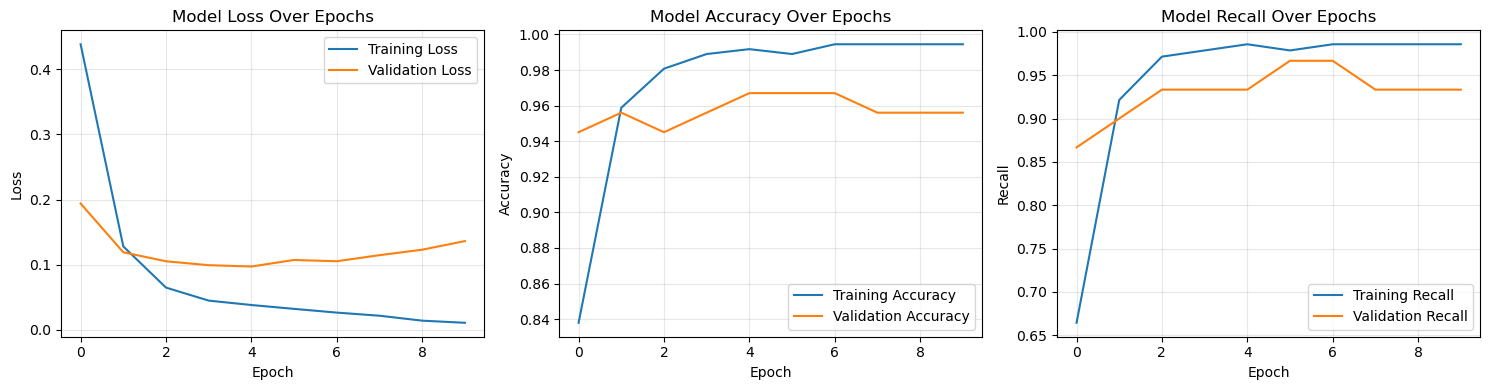

In [154]:
# Plot the training history
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss Over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy plot
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Recall plot
axes[2].plot(history.history['recall'], label='Training Recall')
axes[2].plot(history.history['val_recall'], label='Validation Recall')
axes[2].set_title('Model Recall Over Epochs')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Recall')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. Model Loss Over Epochs (Left)

* Training Loss (blue): How well the model fits training data
* Validation Loss (orange): How well it generalizes to unseen data
* Both lines should decrease and stabilize, which seems to be the case for the most part except a slight increase in validation loss at the end indicating some overfitting, this could be due to our limited dataset


2. Model Accuracy Over Epochs (Middle)

* Training Accuracy: Percentage of correct predictions on training data
* Validation Accuracy: Percentage correct on validation data
* Both should increase and plateau, like in our case and the accuracies should be close like we see

3. Model Recall Over Epochs (Right)

* Recall = True Positives / (True Positives + False Negatives), important for medical context
* Measures: "Of all actual cancer cases, how many did we catch?"
* High validation recall like we see and the training and test lines being close together is a good indication

## Model Evaluation on Test Set (MLP)

Now we evaluate our trained MLP model on the unseen test data.

In [155]:
# Make predictions on test set
y_pred_proba_mlp = best_model.predict(X_test_scaled)  # Get probabilities
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int).ravel()  # Convert to binary predictions (threshold=0.5)

# Calculate metrics
print("=" * 50)
print("MLP MODEL - TEST SET EVALUATION")
print("=" * 50)

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("\nConfusion Matrix (0 = Benign, 1 = Malignant):")
conf_df_mlp = pd.DataFrame(cm_mlp, index=['Actual Benign', 'Actual Malignant'],
                           columns=['Predicted Benign', 'Predicted Malignant'])
display(conf_df_mlp)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=['Benign', 'Malignant']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP MODEL - TEST SET EVALUATION

Confusion Matrix (0 = Benign, 1 = Malignant):


,Predicted Benign,Predicted Malignant
Actual Benign,72,0
Actual Malignant,2,40



Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



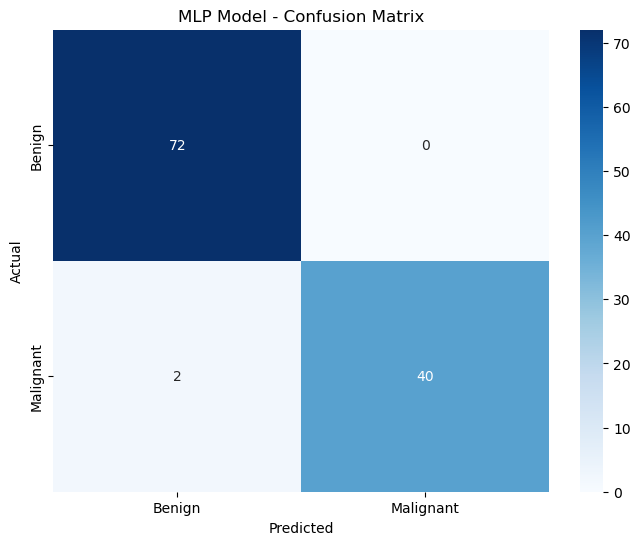

In [156]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('MLP Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

It appears that though the SVM model already had great performance, our MLP model is  identical  as it misclassified only 2 cases of malignant diagnosis. Both models have incredibly high accuracy. The nature of the data made it a great fit for the linear SVM model. However, our MLP model also performs really well despite the small dataset.

## Cross-Validation for MLP

To get a more robust estimate of model performance, we perform K-Fold cross-validation. This helps us understand how the model performs across different data splits.

In [157]:
# We use sklearn's KerasClassifier wrapper for cross-validation
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Function to create the model (for sklearn wrapper)
def create_mlp_model():
    """Create MLP model with the best hyperparameters found"""
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Use the best hyperparameters
    for i in range(best_hps.get('num_layers')):
        model.add(layers.Dense(
            units=best_hps.get(f'units_{i}'),
            activation='relu'
        ))
        model.add(layers.Dropout(rate=best_hps.get(f'dropout_{i}')))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Wrap the model for sklearn
mlp_sklearn = KerasClassifier(
    model=create_mlp_model,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Perform 5-fold stratified cross-validation
print("Performing 5-Fold Cross-Validation...")
print("This may take a few minutes...\n")

# Scale the full dataset for cross-validation
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp_sklearn, X_scaled_full, y, cv=cv, scoring='accuracy')

print("=" * 50)
print("CROSS-VALIDATION RESULTS")
print("=" * 50)
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Performing 5-Fold Cross-Validation...
This may take a few minutes...

CROSS-VALIDATION RESULTS
CV Accuracy Scores: [0.96491228 0.98245614 0.95614035 0.95614035 0.99115044]
Mean CV Accuracy: 0.9702 (+/- 0.0285)


Cross validated accuracy of over 97% confirms that our model is robust despite how the data is split.

## ROC Curve for MLP Model

The ROC curve shows the trade-off between True Positive Rate (Sensitivity/Recall) and False Positive Rate. The Area Under the Curve (AUC) measures overall model performance.

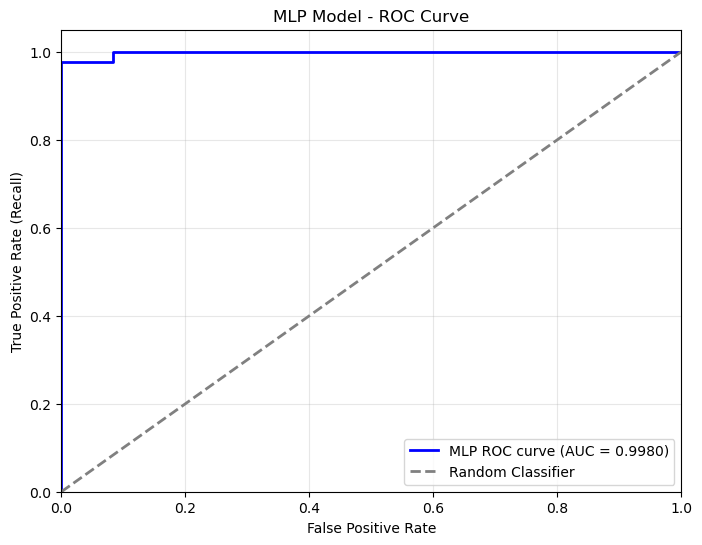


AUC Score: 0.9980


In [158]:
# Calculate ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'MLP ROC curve (AUC = {auc_mlp:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('MLP Model - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAUC Score: {auc_mlp:.4f}")

We get AUC of 99.8%, which is higher than the 99.64% AUC we got on our SVM model. This shows that both models have excellent performance, but the MLP is very slightly ahead in terms of AUC.

## Comparing SVM vs MLP Models

Now we compare the performance of our tuned SVM model with the MLP neural network to understand which model performs better for breast cancer classification based on accuracy.

### Re-training SVM for Fair Comparison

To ensure a fair comparison, we need to train the SVM model on the same scaled data that we used for MLP. The SVM model from earlier sections used MinMax scaling, but for neural networks we used StandardScaler.

In [159]:
# We use the MinMaxScaler to bring all the features in between 0 and 1
# We do this as MinMaxScaling worked the best for our best SVM model
# This is the additional code we need for scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,  stratify=y, random_state=42)


In [161]:
# Replicating our earlier SVM model

svm_comparison = SVC(
    probability=True, 
    random_state=42
)

# Fit on the same scaled training data
svm_comparison.fit(X_train, y_train)

# Make predictions
y_pred_svm_comparison = svm_comparison.predict(X_test)
y_pred_proba_svm = svm_comparison.predict_proba(X_test)[:, 1]

### Side-by-Side Performance Comparison

In [162]:
# Calculate all metrics for both models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# MLP Metrics
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)
mlp_auc = roc_auc_score(y_test, y_pred_proba_mlp)

# SVM Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm_comparison)
svm_precision = precision_score(y_test, y_pred_svm_comparison)
svm_recall = recall_score(y_test, y_pred_svm_comparison)
svm_f1 = f1_score(y_test, y_pred_svm_comparison)
svm_auc = roc_auc_score(y_test, y_pred_proba_svm)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_auc],
    'MLP': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_auc],
    'Difference (MLP - SVM)': [
        mlp_accuracy - svm_accuracy,
        mlp_precision - svm_precision,
        mlp_recall - svm_recall,
        mlp_f1 - svm_f1,
        mlp_auc - svm_auc
    ]
})

print("=" * 70)
print("MODEL PERFORMANCE COMPARISON: SVM vs MLP")
print("=" * 70)
display(comparison_df.round(4))

MODEL PERFORMANCE COMPARISON: SVM vs MLP


,Metric,SVM,MLP,Difference (MLP - SVM)
0,Accuracy,0.9825,0.9825,0.0000
1,Precision,1.0000,1.0000,0.0000
2,Recall,0.9524,0.9524,0.0000
3,F1-Score,0.9756,0.9756,0.0000
4,AUC-ROC,0.9964,0.9980,0.0017


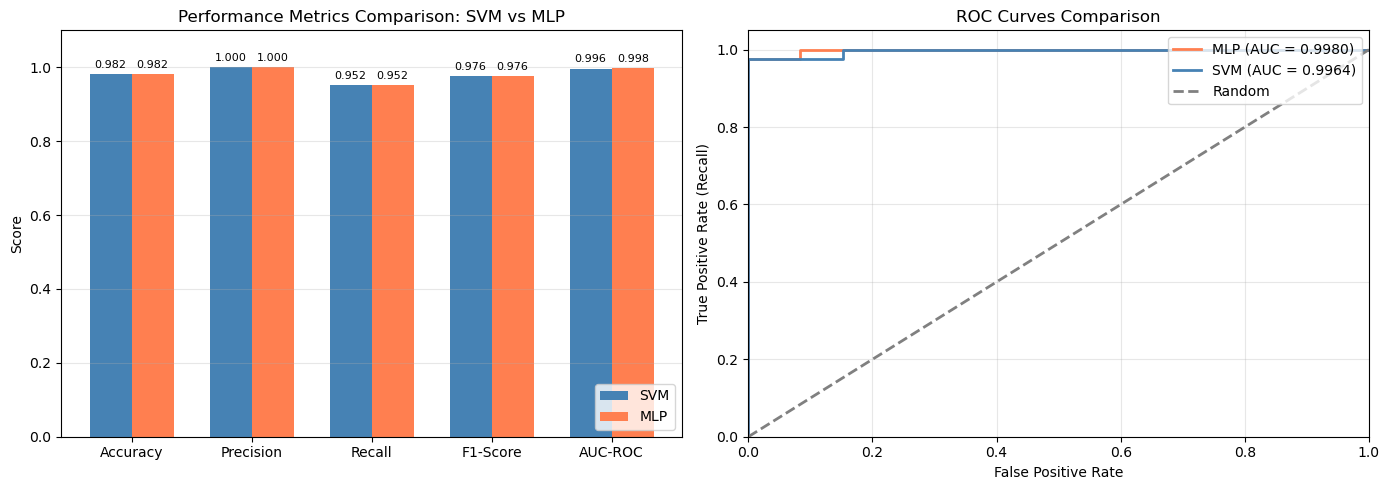

In [163]:
# Visual comparison of metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_auc]
mlp_scores = [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_auc]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, svm_scores, width, label='SVM', color='steelblue')
bars2 = axes[0].bar(x + width/2, mlp_scores, width, label='MLP', color='coral')

axes[0].set_ylabel('Score')
axes[0].set_title('Performance Metrics Comparison: SVM vs MLP')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend(loc="lower right")
axes[0].set_ylim([0, 1.1])
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    axes[0].annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# ROC curves comparison
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
axes[1].plot(fpr_mlp, tpr_mlp, color='coral', lw=2, label=f'MLP (AUC = {mlp_auc:.4f})')
axes[1].plot(fpr_svm, tpr_svm, color='steelblue', lw=2, label=f'SVM (AUC = {svm_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('ROC Curves Comparison')
axes[1].legend(loc="upper right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

What we see is that both models are identical when we are trying to maximize accuracy, with the MLP model having marginally better AUC. We aren't seeing major gains from Neural Networks here as our SVM was already doing an excellent job with the dataset. However, our tuned MLP model does just as well despite the small size of the dataset.

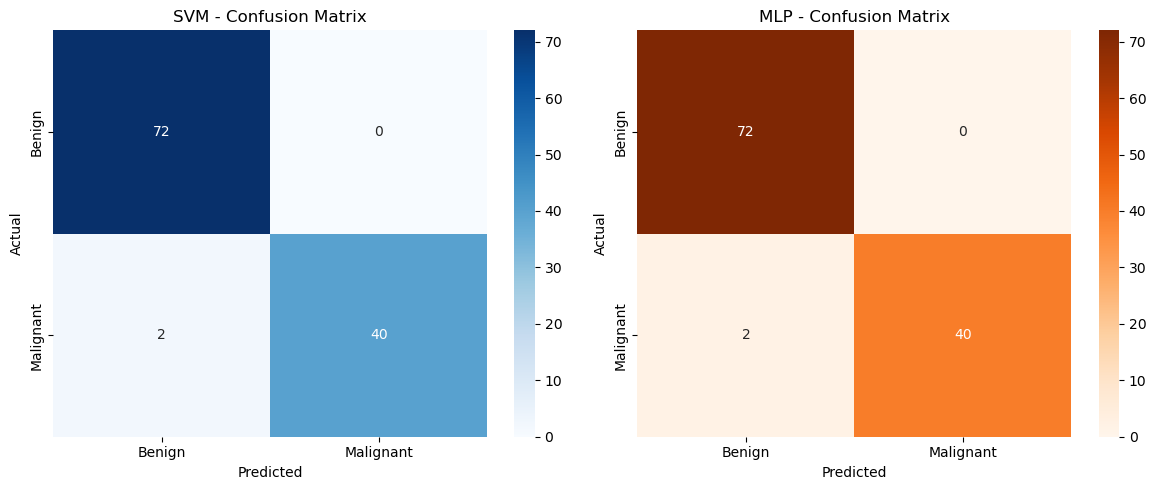


Confusion Matrix Analysis:
SVM - True Negatives: 72, False Positives: 0
SVM - False Negatives: 2, True Positives: 40

MLP - True Negatives: 72, False Positives: 0
MLP - False Negatives: 2, True Positives: 40


In [164]:
# Confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_comparison)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
axes[0].set_title('SVM - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# MLP Confusion Matrix
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
axes[1].set_title('MLP - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print the actual numbers
print("\nConfusion Matrix Analysis:")
print(f"SVM - True Negatives: {cm_svm[0,0]}, False Positives: {cm_svm[0,1]}")
print(f"SVM - False Negatives: {cm_svm[1,0]}, True Positives: {cm_svm[1,1]}")
print(f"\nMLP - True Negatives: {cm_mlp[0,0]}, False Positives: {cm_mlp[0,1]}")
print(f"MLP - False Negatives: {cm_mlp[1,0]}, True Positives: {cm_mlp[1,1]}")

The results are identical for both SVM and MLP models when we are trying to maximize accuracy.

## Threshold Tuning for Maximum Recall (Zero False Negatives)

In medical diagnosis, **False Negatives are extremely dangerous** - missing a cancer case could be fatal. Here we tune the classification threshold to maximize recall, aiming for **zero false negatives** even at the cost of accuracy and precision.

We already did this for our SVM model, now let's try this for the MLP and compare as this represents the true strength of our model.

**How it works:**
- By default, we classify as "Malignant" (1) if probability > 0.5
- By **lowering the threshold**, we classify more cases as Malignant
- This catches more true cancer cases (higher recall) but may also flag more benign cases as malignant (lower precision)
- In medical screening, it's better to have false alarms than to miss actual cancer cases

In [165]:
# Explore how different thresholds affect recall and false negatives to find the optimal threshold for 100% recall
thresholds_to_test = np.arange(0.01, 0.99, 0.01)

results = []
for thresh in thresholds_to_test:
    y_pred_thresh = (y_pred_proba_mlp >= thresh).astype(int).ravel()
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    
    # Calculate metrics
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    results.append({
        'threshold': thresh,
        'recall': recall,
        'precision': precision,
        'accuracy': accuracy,
        'f1': f1,
        'false_negatives': fn,
        'false_positives': fp,
        'true_positives': tp,
        'true_negatives': tn
    })

results_df = pd.DataFrame(results)

# Find the threshold that gives 0 false negatives (100% recall)
zero_fn_thresholds = results_df[results_df['false_negatives'] == 0]
if len(zero_fn_thresholds) > 0:
    # Among thresholds with 0 FN, pick the one with highest accuracy
    best_zero_fn = zero_fn_thresholds.loc[zero_fn_thresholds['accuracy'].idxmax()]
    print("=" * 70)
    print("THRESHOLD FOR ZERO FALSE NEGATIVES FOUND!")
    print("=" * 70)
    print(f"Optimal Threshold: {best_zero_fn['threshold']:.2f}")
    print(f"False Negatives: {int(best_zero_fn['false_negatives'])} (ZERO - All cancer cases caught!)")
    print(f"False Positives: {int(best_zero_fn['false_positives'])}")
    print(f"Recall: {best_zero_fn['recall']:.4f} (100% - Perfect!)")
    print(f"Precision: {best_zero_fn['precision']:.4f}")
    print(f"Accuracy: {best_zero_fn['accuracy']:.4f}")
else:
    # If no threshold gives 0 FN, find the one with minimum FN
    min_fn_idx = results_df['false_negatives'].idxmin()
    best_zero_fn = results_df.loc[min_fn_idx]
    print("=" * 70)
    print("MINIMUM FALSE NEGATIVES THRESHOLD")
    print("=" * 70)
    print(f"Optimal Threshold: {best_zero_fn['threshold']:.2f}")
    print(f"Minimum False Negatives: {int(best_zero_fn['false_negatives'])}")
    
optimal_threshold_recall = best_zero_fn['threshold']

THRESHOLD FOR ZERO FALSE NEGATIVES FOUND!
Optimal Threshold: 0.02
False Negatives: 0 (ZERO - All cancer cases caught!)
False Positives: 8
Recall: 1.0000 (100% - Perfect!)
Precision: 0.8400
Accuracy: 0.9298


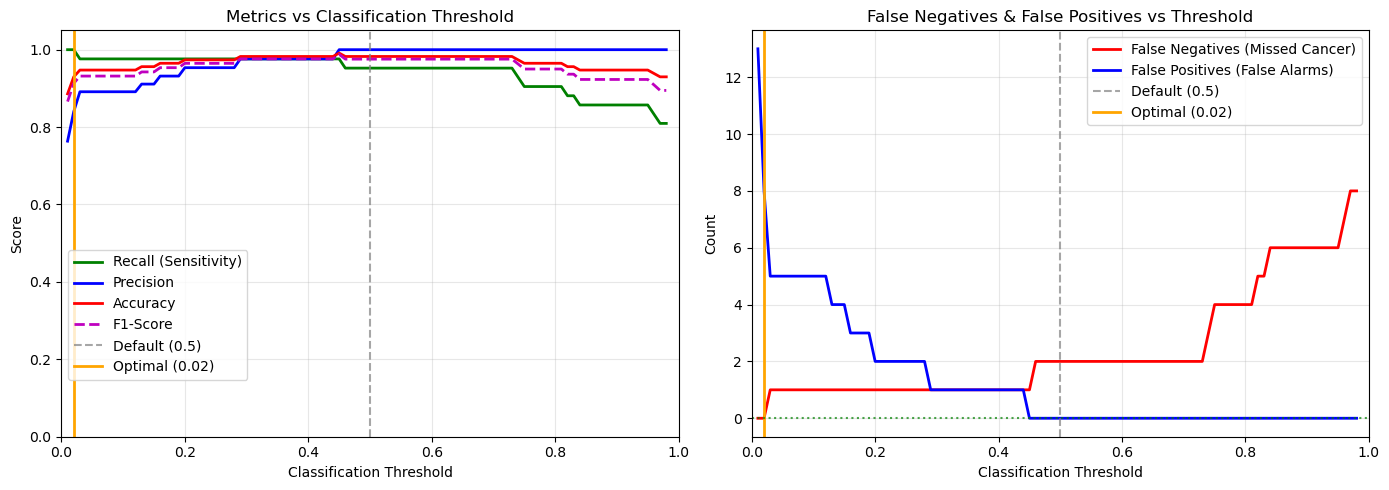


 Key Insight: Lowering the threshold catches more cancer cases but increases false alarms.


In [166]:
# Visualize the trade-off between threshold and metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Metrics vs Threshold
axes[0].plot(results_df['threshold'], results_df['recall'], 'g-', lw=2, label='Recall (Sensitivity)')
axes[0].plot(results_df['threshold'], results_df['precision'], 'b-', lw=2, label='Precision')
axes[0].plot(results_df['threshold'], results_df['accuracy'], 'r-', lw=2, label='Accuracy')
axes[0].plot(results_df['threshold'], results_df['f1'], 'm--', lw=2, label='F1-Score')
axes[0].axvline(x=0.5, color='gray', linestyle='--', alpha=0.7, label='Default (0.5)')
axes[0].axvline(x=optimal_threshold_recall, color='orange', linestyle='-', lw=2, label=f'Optimal ({optimal_threshold_recall:.2f})')
axes[0].set_xlabel('Classification Threshold')
axes[0].set_ylabel('Score')
axes[0].set_title('Metrics vs Classification Threshold')
axes[0].legend(loc='center left', bbox_to_anchor=(0, 0.3))
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1.05])

# Plot 2: False Negatives vs Threshold
axes[1].plot(results_df['threshold'], results_df['false_negatives'], 'r-', lw=2, label='False Negatives (Missed Cancer)')
axes[1].plot(results_df['threshold'], results_df['false_positives'], 'b-', lw=2, label='False Positives (False Alarms)')
axes[1].axvline(x=0.5, color='gray', linestyle='--', alpha=0.7, label='Default (0.5)')
axes[1].axvline(x=optimal_threshold_recall, color='orange', linestyle='-', lw=2, label=f'Optimal ({optimal_threshold_recall:.2f})')
axes[1].axhline(y=0, color='green', linestyle=':', alpha=0.7)
axes[1].set_xlabel('Classification Threshold')
axes[1].set_ylabel('Count')
axes[1].set_title('False Negatives & False Positives vs Threshold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 1])

plt.tight_layout()
plt.show()

print("\n Key Insight: Lowering the threshold catches more cancer cases but increases false alarms.")

In [167]:
# Apply the optimal threshold for maximum recall
y_pred_mlp_tuned = (y_pred_proba_mlp >= optimal_threshold_recall).astype(int).ravel()

# Confusion matrix with tuned threshold
cm_mlp_tuned = confusion_matrix(y_test, y_pred_mlp_tuned)

print("=" * 70)
print("MLP MODEL WITH TUNED THRESHOLD (Maximizing Recall)")
print("=" * 70)
print(f"Threshold: {optimal_threshold_recall:.2f} (vs default 0.5)")
print("\nConfusion Matrix:")
conf_df_mlp_tuned = pd.DataFrame(cm_mlp_tuned, 
                                  index=['Actual Benign', 'Actual Malignant'],
                                  columns=['Predicted Benign', 'Predicted Malignant'])
display(conf_df_mlp_tuned)

# Detailed metrics
tn, fp, fn, tp = cm_mlp_tuned.ravel()
print(f"\n📊 Detailed Breakdown:")
print(f"   True Negatives (Correct Benign):     {tn}")
print(f"   True Positives (Correct Malignant):  {tp}")
print(f"   False Positives (False Alarms):      {fp}")
print(f"   False Negatives (MISSED CANCER):     {fn} {'✅ ZERO!' if fn == 0 else '⚠️'}")

print(f"\n📈 Performance Metrics:")
print(f"   Recall (Sensitivity):    {recall_score(y_test, y_pred_mlp_tuned):.4f} {'✅ PERFECT!' if recall_score(y_test, y_pred_mlp_tuned) == 1.0 else ''}")
print(f"   Precision:               {precision_score(y_test, y_pred_mlp_tuned):.4f}")
print(f"   Accuracy:                {accuracy_score(y_test, y_pred_mlp_tuned):.4f}")

MLP MODEL WITH TUNED THRESHOLD (Maximizing Recall)
Threshold: 0.02 (vs default 0.5)

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,64,8
Actual Malignant,0,42



📊 Detailed Breakdown:
   True Negatives (Correct Benign):     64
   True Positives (Correct Malignant):  42
   False Positives (False Alarms):      8
   False Negatives (MISSED CANCER):     0 ✅ ZERO!

📈 Performance Metrics:
   Recall (Sensitivity):    1.0000 ✅ PERFECT!
   Precision:               0.8400
   Accuracy:                0.9298


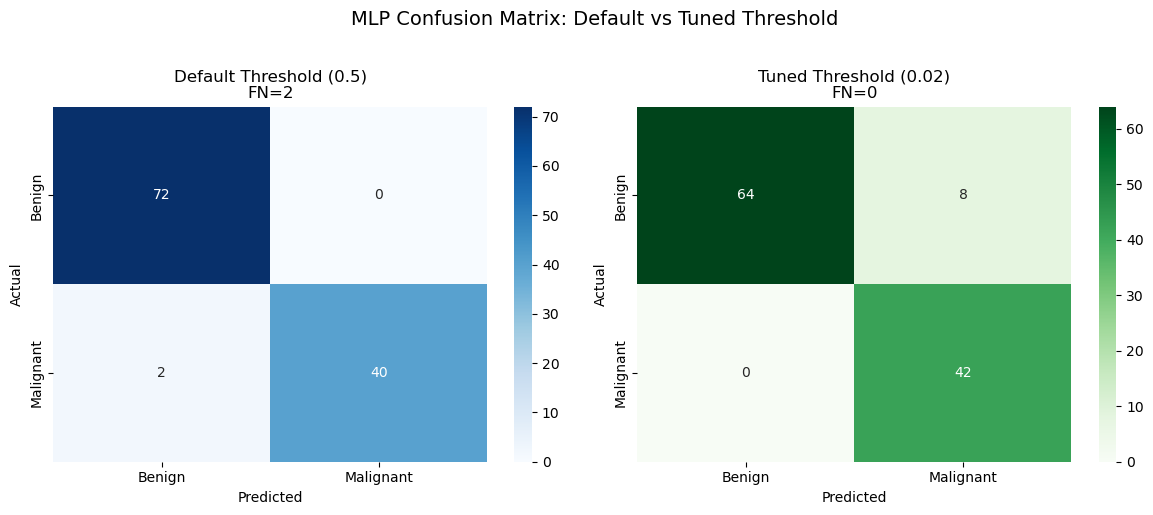

In [168]:
# Compare Default vs Tuned Threshold side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Default threshold (0.5)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
axes[0].set_title(f'Default Threshold (0.5)\nFN={confusion_matrix(y_test, y_pred_mlp).ravel()[2]}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Tuned threshold
sns.heatmap(cm_mlp_tuned, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
axes[1].set_title(f'Tuned Threshold ({optimal_threshold_recall:.2f})\nFN={fn}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.suptitle('MLP Confusion Matrix: Default vs Tuned Threshold', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

So, while our basic model gives us 2 false negatives, our medel tuned for medical context leads to 0 false negatives at the cost of 8 false positives. This will increase operational costs of the medical facility, but it is a better model in our context as identifying all malignant cases without fail is the most critical factor for our context.

### SVM Threshold Tuning (For Comparison)

In [169]:
# SVM with optimized preprocessing for fair comparison
# We use the training and test tests with MinMaxScaling to get the best SVM model
svm_for_comparison = SVC(probability=True, random_state=42)
svm_for_comparison.fit(X_train, y_train)
y_pred_proba_svm_comp = svm_for_comparison.predict_proba(X_test)[:, 1]

# Find SVM threshold for zero false negatives
thresholds_svm = np.arange(0.05, 0.99, 0.05)
for thresh in thresholds_svm:
    y_pred_temp = (y_pred_proba_svm_comp >= thresh).astype(int)
    fn = confusion_matrix(y_test, y_pred_temp).ravel()[2]
    if fn == 0:
        optimal_threshold_svm = thresh
        break

# Apply optimal threshold to SVM
y_pred_svm_tuned = (y_pred_proba_svm_comp >= optimal_threshold_svm).astype(int)
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)

print("=" * 70)
print("SVM MODEL WITH TUNED THRESHOLD (Maximizing Recall)")
print("=" * 70)
print(f"Optimal Threshold: {optimal_threshold_svm:.2f}")
tn_svm, fp_svm, fn_svm, tp_svm = cm_svm_tuned.ravel()
print(f"False Negatives: {fn_svm} {'✅ ZERO!' if fn_svm == 0 else ''}")
print(f"False Positives: {fp_svm}")
print(f"Recall: {recall_score(y_test, y_pred_svm_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm_tuned):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_tuned):.4f}")

SVM MODEL WITH TUNED THRESHOLD (Maximizing Recall)
Optimal Threshold: 0.05
False Negatives: 0 ✅ ZERO!
False Positives: 11
Recall: 1.0000
Precision: 0.7925
Accuracy: 0.9035


As we saw in the previous section as well. Our SVM model trained on MinMaxScaled data gets 11 false positives when it tries to achieve 100% recall

### Tuned MLP vs Tuned SVM Comparison (Zero False Negatives)

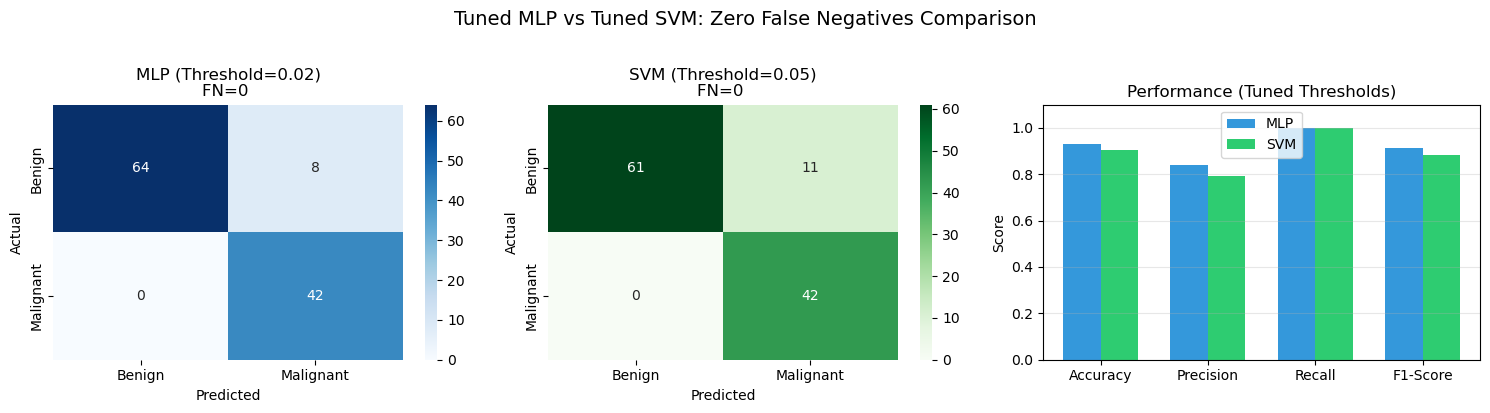


 TUNED MODEL COMPARISON (Both with Zero False Negatives)


,Metric,MLP (Tuned),SVM (Tuned)
0,Threshold,0.02,0.05
1,Accuracy,0.9298,0.9035
2,Precision,0.8400,0.7925
3,Recall,1.0000,1.0000
4,F1-Score,0.9130,0.8842
5,False Positives,8,11
6,False Negatives,0,0



 MLP is better - fewer false positives (8 vs 11)


In [171]:
# Side-by-side comparison: Tuned MLP vs Tuned SVM
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Confusion Matrix - MLP Tuned
sns.heatmap(cm_mlp_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[0].set_title(f'MLP (Threshold={optimal_threshold_recall:.2f})\nFN=0 ')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

# Confusion Matrix - SVM Tuned
sns.heatmap(cm_svm_tuned, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[1].set_title(f'SVM (Threshold={optimal_threshold_svm:.2f})\nFN={fn_svm} ')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

# Metrics Comparison Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
mlp_metrics = [accuracy_score(y_test, y_pred_mlp_tuned), precision_score(y_test, y_pred_mlp_tuned),
               recall_score(y_test, y_pred_mlp_tuned), f1_score(y_test, y_pred_mlp_tuned)]
svm_metrics = [accuracy_score(y_test, y_pred_svm_tuned), precision_score(y_test, y_pred_svm_tuned),
               recall_score(y_test, y_pred_svm_tuned), f1_score(y_test, y_pred_svm_tuned)]

x = np.arange(len(metrics)); width = 0.35
axes[2].bar(x - width/2, mlp_metrics, width, label='MLP', color='#3498db')
axes[2].bar(x + width/2, svm_metrics, width, label='SVM', color='#2ecc71')
axes[2].set_ylabel('Score'); axes[2].set_title('Performance (Tuned Thresholds)')
axes[2].set_xticks(x); axes[2].set_xticklabels(metrics); axes[2].legend()
axes[2].set_ylim(0, 1.1); axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Tuned MLP vs Tuned SVM: Zero False Negatives Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Summary comparison table
print("\n" + "=" * 70)
print(" TUNED MODEL COMPARISON (Both with Zero False Negatives)")
print("=" * 70)
comparison = pd.DataFrame({
    'Metric': ['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'False Positives', 'False Negatives'],
    'MLP (Tuned)': [f"{optimal_threshold_recall:.2f}", f"{mlp_metrics[0]:.4f}", f"{mlp_metrics[1]:.4f}", 
                   f"{mlp_metrics[2]:.4f}", f"{mlp_metrics[3]:.4f}", cm_mlp_tuned[0,1], cm_mlp_tuned[1,0]],
    'SVM (Tuned)': [f"{optimal_threshold_svm:.2f}", f"{svm_metrics[0]:.4f}", f"{svm_metrics[1]:.4f}", 
                   f"{svm_metrics[2]:.4f}", f"{svm_metrics[3]:.4f}", cm_svm_tuned[0,1], cm_svm_tuned[1,0]]
})
display(comparison)

# Winner determination
if cm_mlp_tuned[0,1] < cm_svm_tuned[0,1]:
    print(f"\n MLP is better - fewer false positives ({cm_mlp_tuned[0,1]} vs {cm_svm_tuned[0,1]})")
elif cm_svm_tuned[0,1] < cm_mlp_tuned[0,1]:
    print(f"\n SVM is better - fewer false positives ({cm_svm_tuned[0,1]} vs {cm_mlp_tuned[0,1]})")
else:
    print(f"\n Both models perform equally with zero false negatives!")

MLP does a better job overall when maximizing recall, which is our main metric when looking at a model which detects malignant cells. SVM is simpler to implement and gets us similar results, but over larger datasets MLP may turn out to be a stronger model.

### Medical Interpretation

**Why Zero False Negatives Matters:**
- A **False Negative** means telling a cancer patient they are healthy - this is potentially fatal
- A **False Positive** means telling a healthy person they might have cancer - this leads to additional testing but is not life-threatening

**Trade-off Analysis:**
- By lowering the threshold, we ensure ALL malignant cases are flagged
- The cost is more false alarms (benign cases flagged as potentially malignant)
- In medical screening, this trade-off is acceptable and preferred
- Patients flagged as positive would undergo additional diagnostic tests (biopsy) to confirm

**Practical Application:**
- Use the tuned threshold model for **initial screening** (catch all potential cases)
- Follow up positive predictions with more detailed testing for confirmation

**Better Model**
- Our MLP model does a better job than our optimized SVM model when it comes to maximizing recall.
- This goes to show the power of Neural Networks, it did a better job after optimization even though the dataset was a great we had was a great fit for SVM.

## Conclusion


**1. Model Performance Summary:**
- Both SVM and MLP achieve strong performance on this breast cancer dataset
- The dataset is relatively small (~569 samples) and well-structured, which suits both models

**2. Why Performance May Vary:**

**SVM Strengths:**
- Works extremely well with small to medium datasets
- Effective in high-dimensional spaces (30 features here)
- Memory efficient - only stores support vectors
- Clear geometric interpretation with the maximum margin hyperplane

**MLP Strengths:**
- Can learn more complex non-linear patterns
- More flexible architecture through tunable layers and neurons
- Can potentially achieve higher accuracy with more data, but we still got good results after tuning
- Better at capturing feature interactions automatically

**3. For Cancer Detection (Medical Context):**
- **Recall (Sensitivity)** is crucial - we want to catch ALL cancer cases
- False Negatives (missing a cancer case) are more dangerous than False Positives
- A model with higher recall is preferred even if it slightly sacrifices precision

**Considering everything, the Neural Network based MLP is the better model as we could tune it to maximize recall without losing too much accuracy. When both models are optimized to maximize recall, MLP does a better job than SVM despite the small dataset. This goes to show the potential of Neural Network in optimizing Machine Learning Models**

